<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2701-2750.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2892]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [2893]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

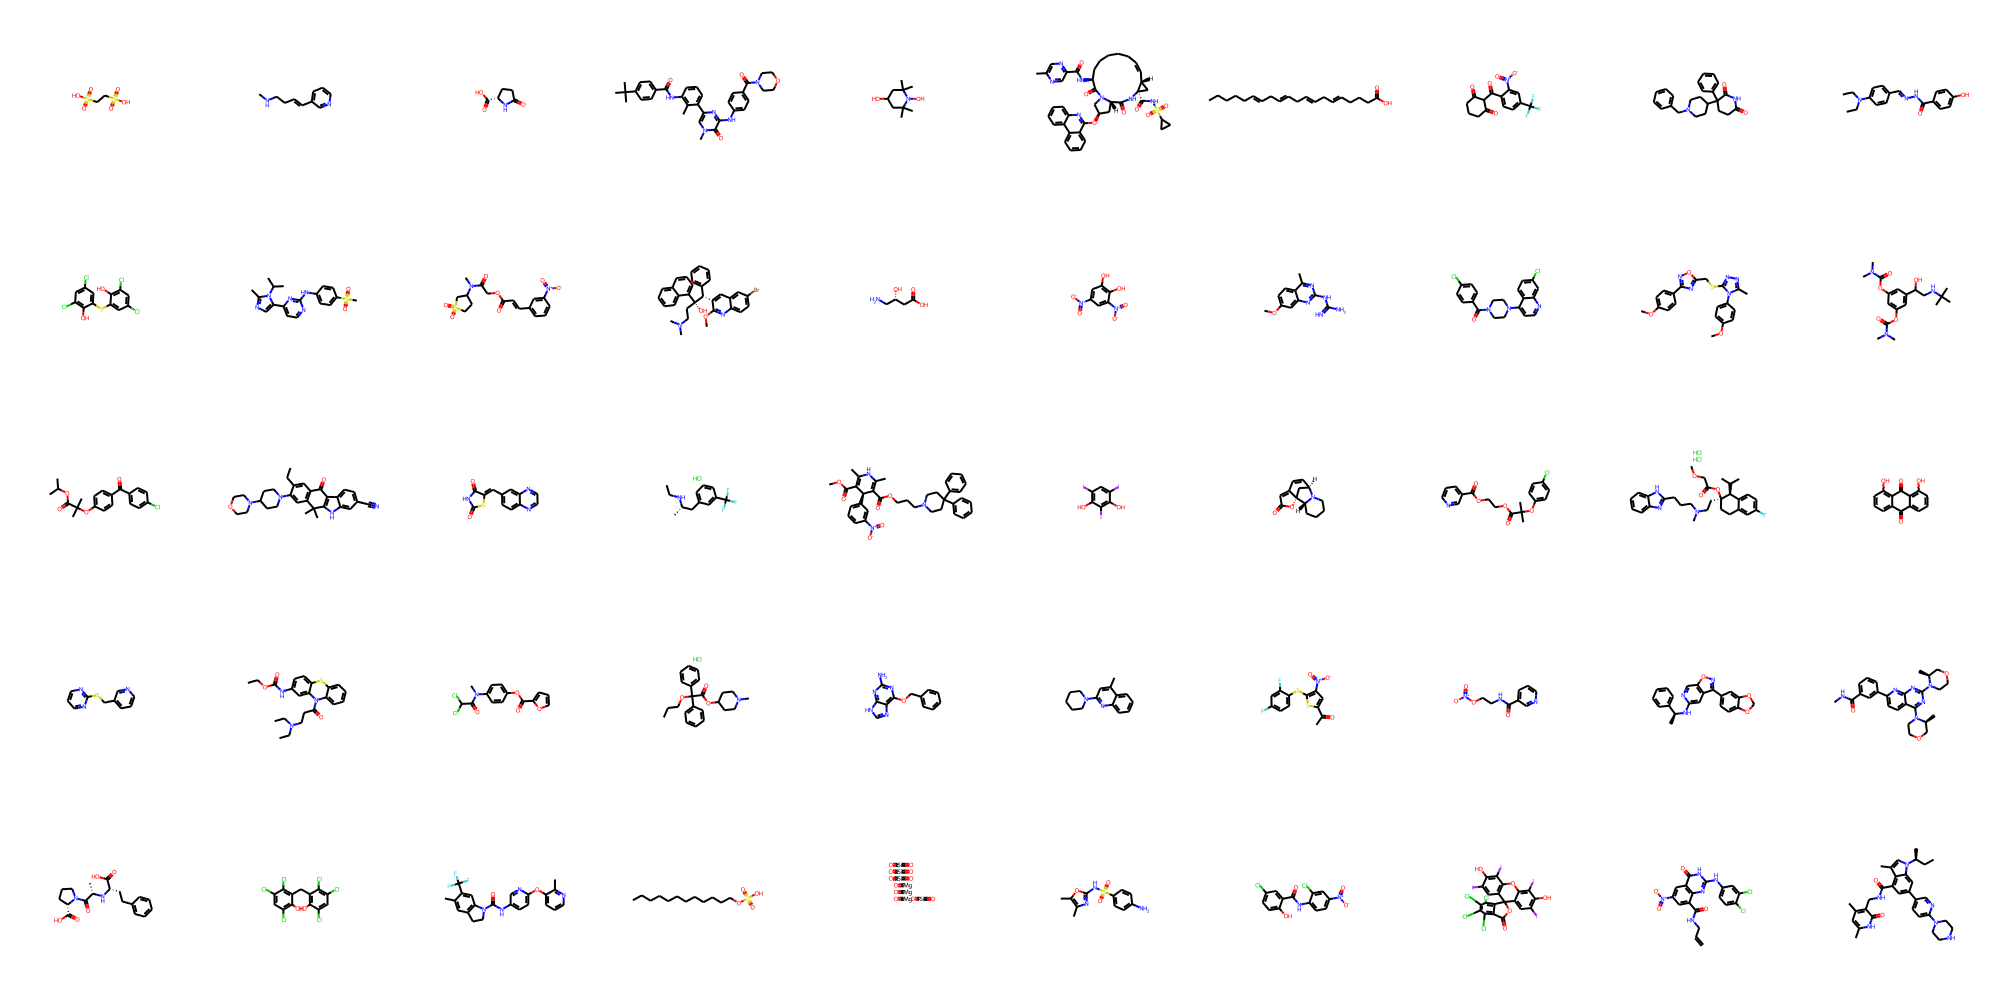

In [2894]:
smiles_list = [

'O=S(=O)(O)CCS(=O)(=O)O',
'CNCC/C=C/c1cccnc1',
'O=C1CC[C@@H](C(=O)O)N1',
'Cc1c(NC(=O)c2ccc(C(C)(C)C)cc2)cccc1-c1cn(C)c(=O)c(Nc2ccc(C(=O)N3CCOCC3)cc2)n1',
'CC1(C)CC(O)CC(C)(C)N1O',
'Cc1cnc(C(=O)N[C@H]2CCCCC/C=C\[C@@H]3C[C@@]3(C(=O)NS(=O)(=O)C3CC3)NC(=O)[C@@H]3C[C@@H](Oc4nc5ccccc5c5ccccc45)CN3C2=O)cn1',
'CCCCC/C=C/C/C=C/C/C=C/C/C=C/CCCC(=O)O',
'O=C1CCCC(=O)C1C(=O)c1ccc(C(F)(F)F)cc1[N+](=O)[O-]',
'O=C1CCC(c2ccccc2)(C2CCN(Cc3ccccc3)CC2)C(=O)N1',
'CCN(CC)c1ccc(/C=N/NC(=O)c2ccc(O)cc2)cc1',
'Oc1c(Cl)cc(Cl)cc1Sc1cc(Cl)cc(Cl)c1O',
'Cc1ncc(-c2ccnc(Nc3ccc(S(C)(=O)=O)cc3)n2)n1C(C)C',
'CN(C(=O)COC(=O)/C=C/c1cccc([N+](=O)[O-])c1)C1CCS(=O)(=O)C1',
'COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(CCN(C)C)c1cccc2ccccc12',
'NC[C@H](O)CC(=O)O',
'O=[N+]([O-])c1cc(O)c(O)c([N+](=O)[O-])c1',
'COc1ccc2c(C)nc(NC(=N)N)nc2c1',
'O=C(c1ccc(Cl)cc1)N1CCN(c2ccnc3cc(Cl)ccc23)CC1',
'COc1ccc(-c2noc(CSc3nnc(C)n3-c3ccc(OC)cc3)n2)cc1',
'CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1',
'CC(C)OC(=O)C(C)(C)Oc1ccc(C(=O)c2ccc(Cl)cc2)cc1',
'CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3cc(C#N)ccc3c1C2=O',
'O=C1NC(=O)/C(=C/c2ccc3nccnc3c2)S1',
'CCN[C@@H](C)Cc1cccc(C(F)(F)F)c1.Cl',
'COC(=O)C1=C(C)NC(C)=C(C(=O)OCCCN2CCC(c3ccccc3)(c3ccccc3)CC2)[C@H]1c1cccc([N+](=O)[O-])c1',
'Oc1c(I)cc(I)c(O)c1I',
'O=C1C=C2C=C[C@@H]3C[C@@]2(O1)[C@H]1CCCCN31',
'CC(C)(Oc1ccc(Cl)cc1)C(=O)OCCOC(=O)c1cccnc1',
'COCC(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CCc2cc(F)ccc2[C@@H]1C(C)C.Cl.Cl',
'O=C1c2cccc(O)c2C(=O)c2c(O)cccc21',
'c1cnc(SCc2cccnc2)nc1',
'CCOC(=O)Nc1ccc2c(c1)N(C(=O)CCN(CC)CC)c1ccccc1S2',
'CN(C(=O)C(Cl)Cl)c1ccc(OC(=O)c2ccco2)cc1',
'CCCOC(C(=O)OC1CCN(C)CC1)(c1ccccc1)c1ccccc1.Cl',
'Nc1nc(OCc2ccccc2)c2nc[nH]c2n1',
'Cc1cc(N2CCCCC2)nc2ccccc12',
'CC(=O)c1cc([N+](=O)[O-])c(Sc2ccc(F)cc2F)s1',
'O=C(NCCO[N+](=O)[O-])c1cccnc1',
'C[C@H](Nc1cc2c(-c3ccc4c(c3)OCO4)noc2cn1)c1ccccc1',
'CNC(=O)c1cccc(-c2ccc3c(N4CCOC[C@@H]4C)nc(N4CCOC[C@@H]4C)nc3n2)c1',
'C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@H]1C(=O)O',
'Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl',
'Cc1cc2c(cc1C(F)(F)F)N(C(=O)Nc1ccc(Oc3cccnc3C)nc1)CC2',
'CCCCCCCCCCCCOS(=O)(=O)O',
'O=[Mg].O=[Mg].O=[Mg].O=[Si]=O.O=[Si]=O.O=[Si]=O.O=[Si]=O',
'Cc1nc(NS(=O)(=O)c2ccc(N)cc2)oc1C',
'O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O',
'O=C1OC2(c3cc(I)c(O)c(I)c3Oc3c2cc(I)c(O)c3I)c2c(Cl)c(Cl)c(Cl)c(Cl)c21',
'C=CCNC(=O)c1cc([N+](=O)[O-])cc2c(=O)[nH]c(Nc3ccc(Cl)c(Cl)c3)nc12',
'CC[C@H](C)n1cc(C)c2c(C(=O)NCc3c(C)cc(C)[nH]c3=O)cc(-c3ccc(N4CCNCC4)nc3)cc21',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



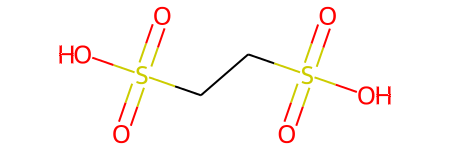

In [2895]:
M1 = mol_list [0]
M1

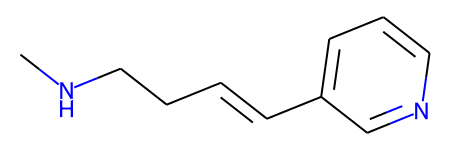

In [2896]:
M2 = mol_list [1]
M2

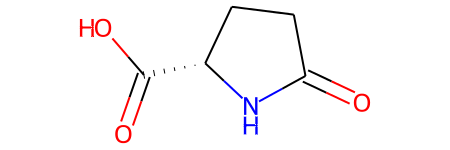

In [2897]:
M3 = mol_list [2]
M3

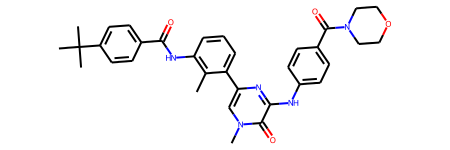

In [2898]:
M4 = mol_list [3]
M4

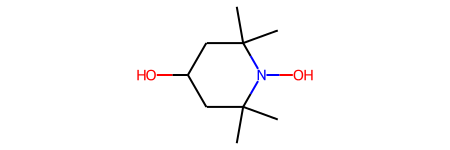

In [2899]:
M5 = mol_list [4]
M5

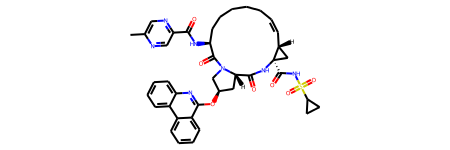

In [2900]:
M6 = mol_list [5]
M6

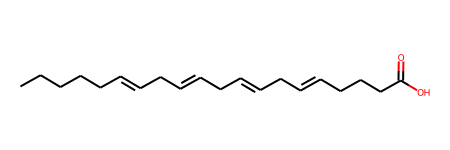

In [2901]:
M7 = mol_list [6]
M7

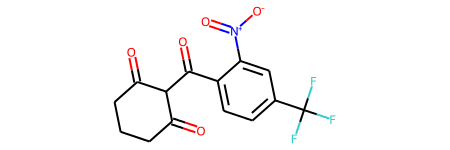

In [2902]:
M8 = mol_list [7]
M8

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


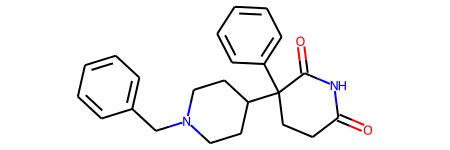

In [2903]:
M9 = mol_list [8]
M9

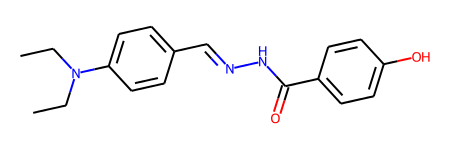

In [2904]:
M10 = mol_list [9]
M10

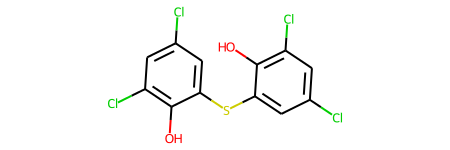

In [2905]:
M11 = mol_list [10]
M11

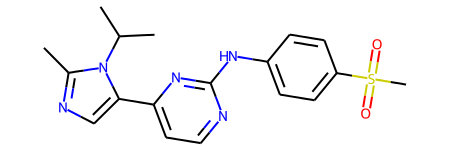

In [2906]:
M12 = mol_list [11]
M12

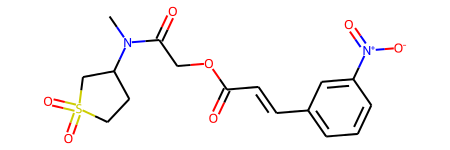

In [2907]:
M13 = mol_list [12]
M13

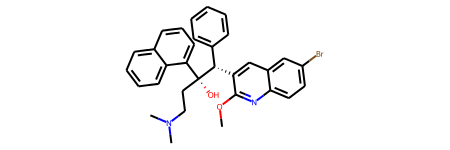

In [2908]:
M14 = mol_list [13]
M14

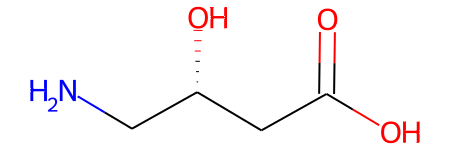

In [2909]:
M15 = mol_list [14]
M15

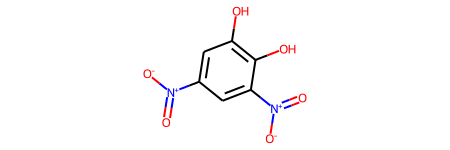

In [2910]:
M16 = mol_list [15]
M16

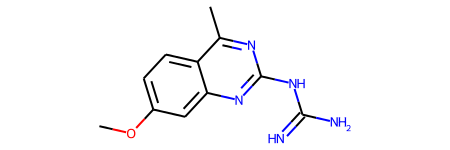

In [2911]:
M17 = mol_list [16]
M17

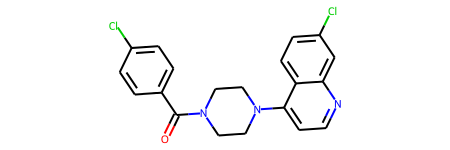

In [2912]:
M18 = mol_list [17]
M18

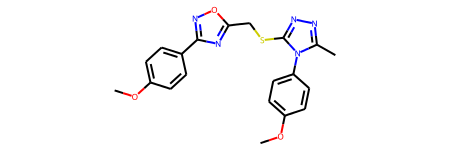

In [2913]:
M19 = mol_list [18]
M19

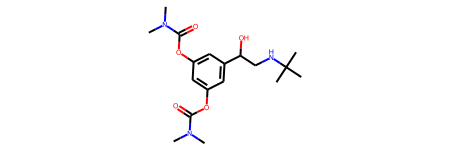

In [2914]:
M20 = mol_list [19]
M20

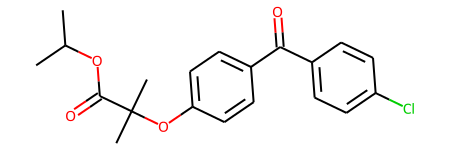

In [2915]:
M21 = mol_list [20]
M21

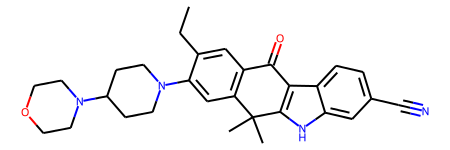

In [2916]:
M22 = mol_list [21]
M22

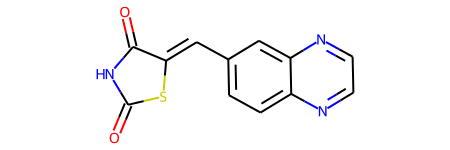

In [2917]:
M23 = mol_list [22]
M23

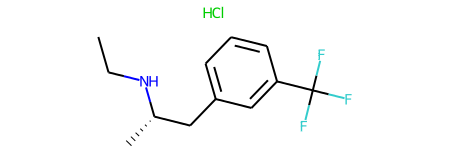

In [2918]:
M24 = mol_list [23]
M24

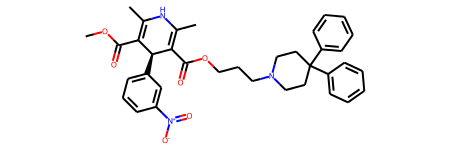

In [2919]:
M25 = mol_list [24]
M25

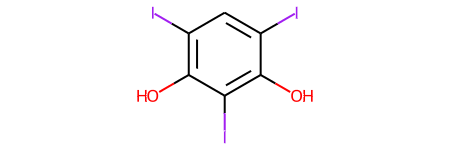

In [2920]:
M26 = mol_list [25]
M26

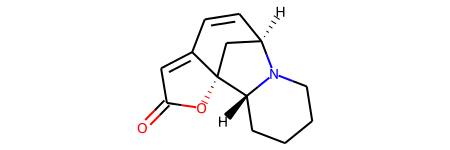

In [2921]:
M27 = mol_list [26]
M27

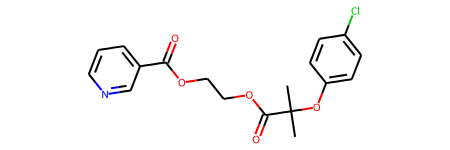

In [2922]:
M28 = mol_list [27]
M28

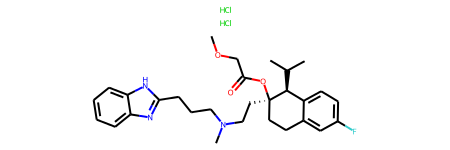

In [2923]:
M29 = mol_list [28]
M29

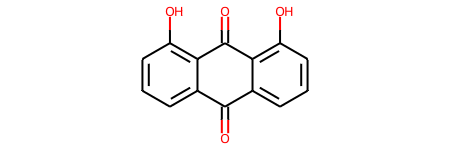

In [2924]:
M30 = mol_list [29]
M30

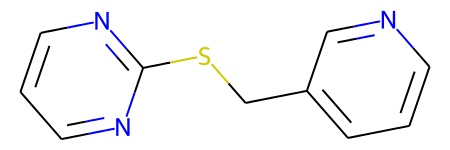

In [2925]:
M31 = mol_list [30]
M31

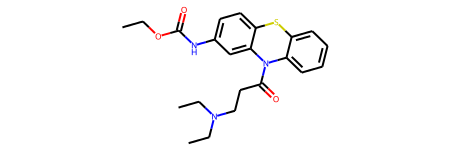

In [2926]:
M32 = mol_list [31]
M32

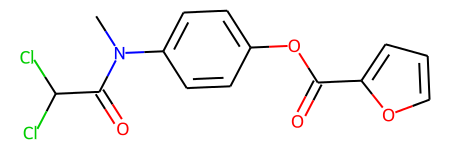

In [2927]:
M33 = mol_list [32]
M33

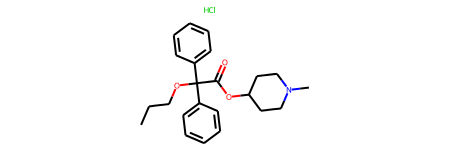

In [2928]:
M34 = mol_list [33]
M34

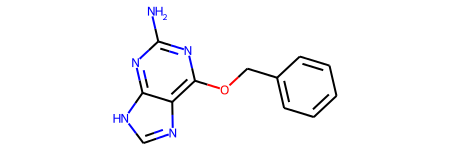

In [2929]:
M35 = mol_list [34]
M35

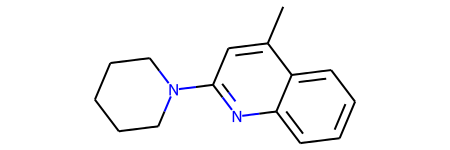

In [2930]:
M36 = mol_list [35]
M36

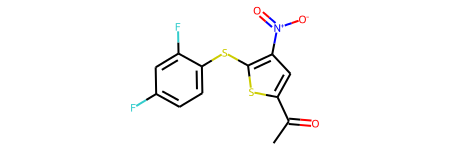

In [2931]:
M37= mol_list [36]
M37

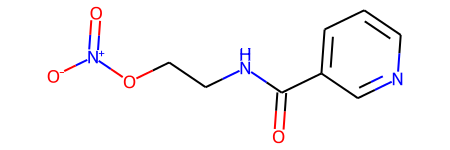

In [2932]:
M38= mol_list [37]
M38

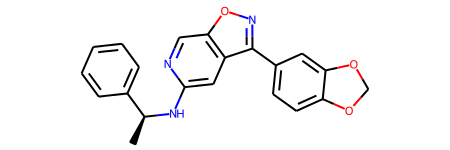

In [2933]:
M39= mol_list [38]
M39

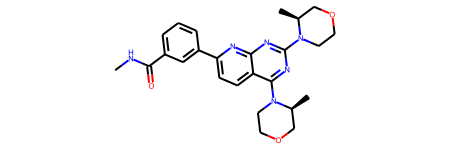

In [2934]:
M40= mol_list [39]
M40

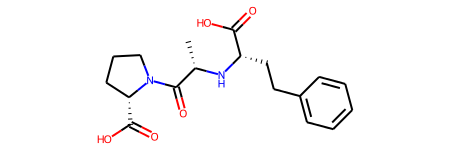

In [2935]:
M41= mol_list [40]
M41

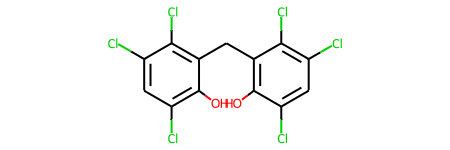

In [2936]:
M42= mol_list [41]
M42

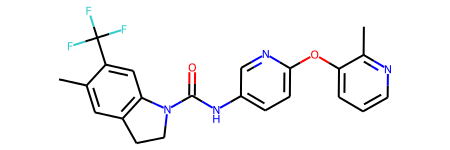

In [2937]:
M43= mol_list [42]
M43

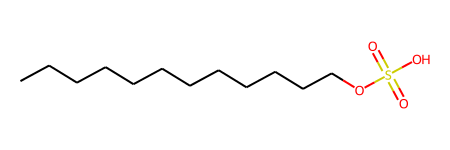

In [2938]:
M44= mol_list [43]
M44

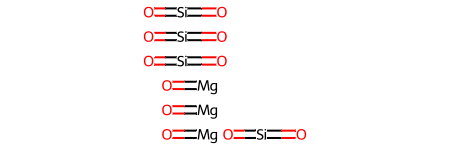

In [2939]:
M45= mol_list [44]
M45

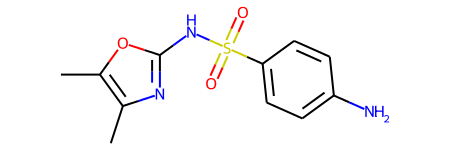

In [2940]:
M46= mol_list [45]
M46

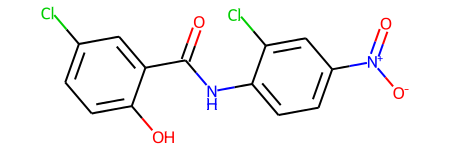

In [2941]:
M47= mol_list [46]
M47

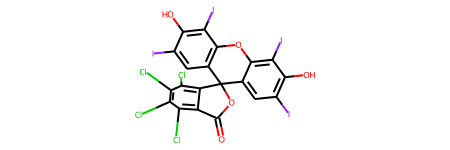

In [2942]:
M48= mol_list [47]
M48

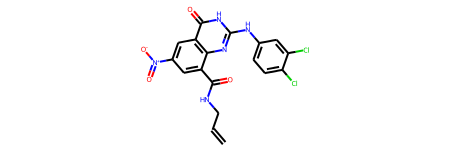

In [2943]:
M49= mol_list [48]
M49

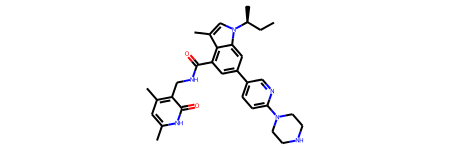

In [2944]:
M50= mol_list [49]
M50

In [2945]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[73, 80, 155, 350, 452, 481, 592, 648, 650, 807]

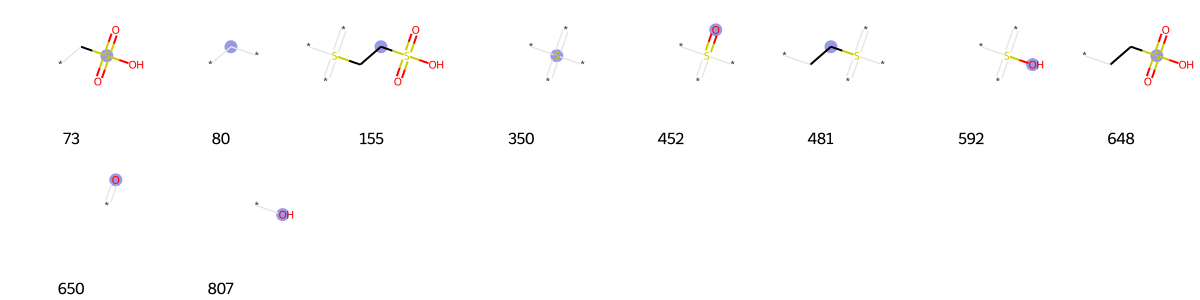

In [2946]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2947]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[19,
 33,
 64,
 65,
 80,
 83,
 128,
 212,
 329,
 332,
 356,
 378,
 400,
 401,
 406,
 437,
 511,
 533,
 562,
 579,
 667,
 676,
 694,
 718,
 726,
 835,
 842,
 849,
 971,
 1009]

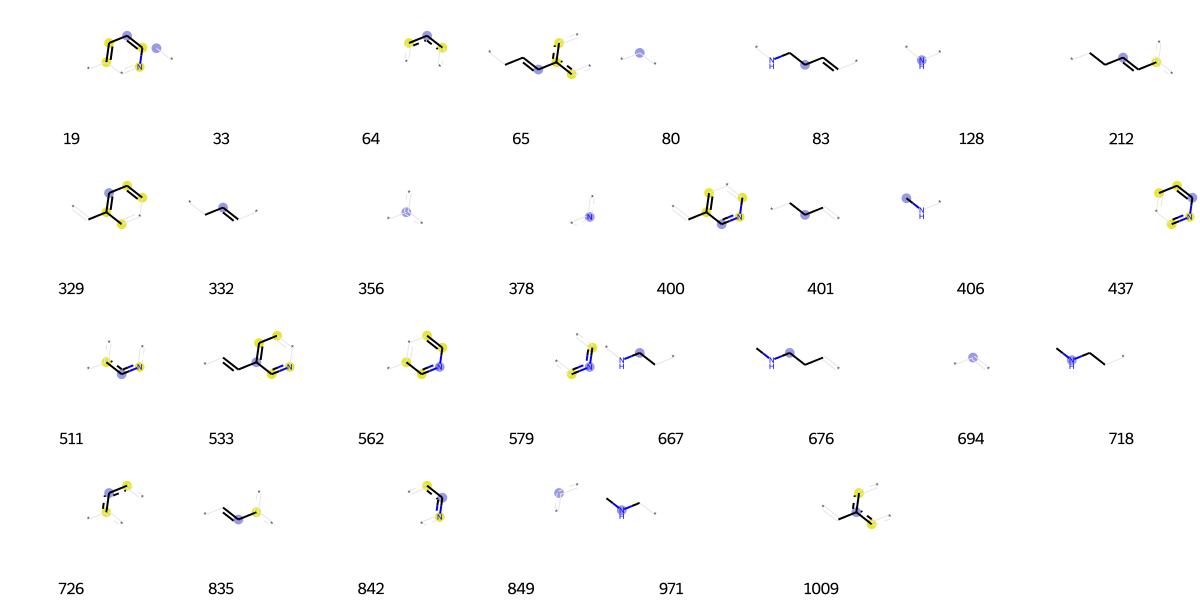

In [2948]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2949]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[90,
 132,
 231,
 301,
 314,
 356,
 362,
 389,
 407,
 551,
 553,
 650,
 661,
 714,
 807,
 841,
 856,
 893,
 926,
 1019]

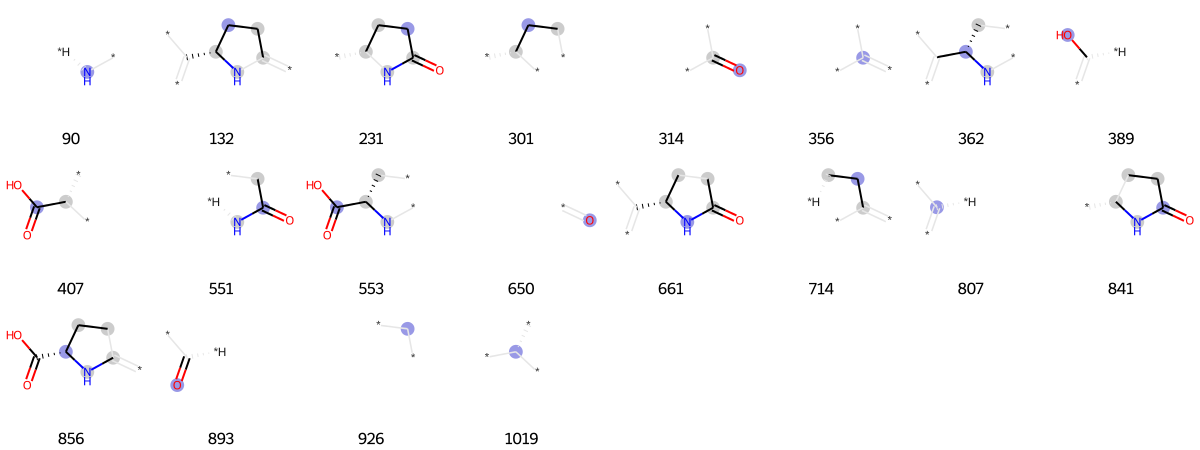

In [2950]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [2951]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[11,
 15,
 33,
 64,
 114,
 121,
 128,
 161,
 191,
 200,
 214,
 252,
 314,
 315,
 327,
 352,
 356,
 361,
 378,
 381,
 385,
 392,
 393,
 394,
 410,
 417,
 456,
 464,
 467,
 480,
 486,
 487,
 491,
 497,
 500,
 504,
 505,
 523,
 532,
 641,
 650,
 656,
 672,
 673,
 698,
 708,
 726,
 771,
 792,
 807,
 831,
 843,
 849,
 852,
 888,
 893,
 926,
 935,
 942,
 947,
 950,
 980,
 984,
 985,
 1004]

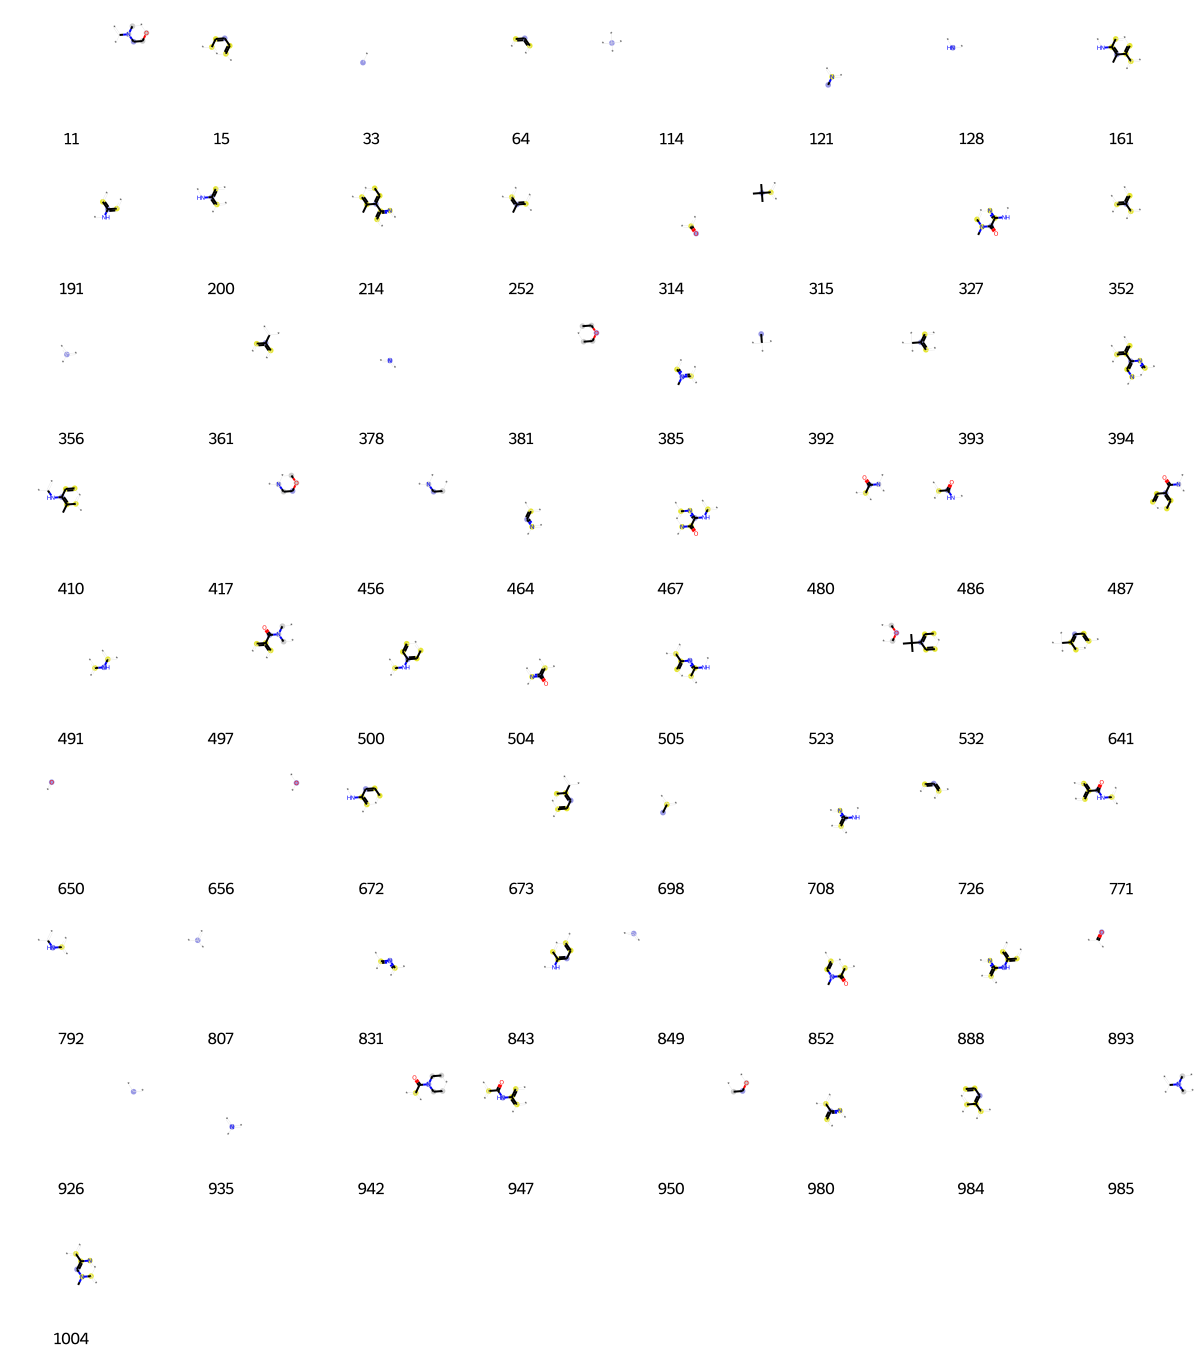

In [2952]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2953]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[5,
 33,
 36,
 59,
 68,
 221,
 233,
 250,
 340,
 572,
 590,
 679,
 807,
 834,
 926,
 935,
 1019]

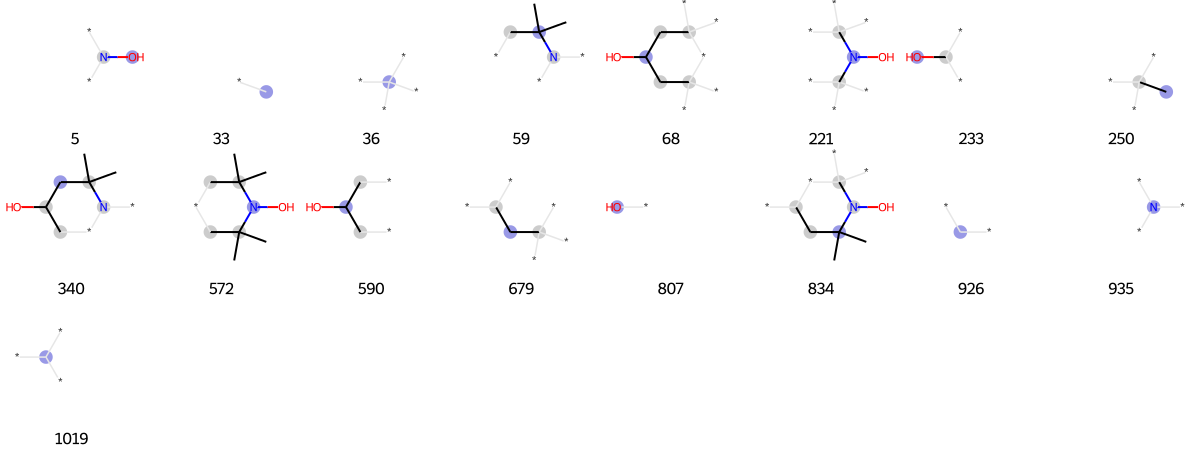

In [2954]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2955]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[2,
 4,
 5,
 10,
 33,
 35,
 36,
 39,
 51,
 59,
 64,
 72,
 73,
 90,
 97,
 104,
 119,
 123,
 128,
 137,
 175,
 189,
 250,
 268,
 288,
 289,
 298,
 301,
 307,
 310,
 314,
 318,
 333,
 350,
 356,
 366,
 372,
 378,
 381,
 383,
 387,
 389,
 397,
 401,
 402,
 420,
 428,
 452,
 483,
 486,
 511,
 523,
 524,
 525,
 549,
 550,
 591,
 628,
 650,
 666,
 679,
 684,
 689,
 695,
 698,
 707,
 726,
 732,
 737,
 739,
 749,
 765,
 807,
 815,
 826,
 831,
 849,
 855,
 871,
 884,
 890,
 893,
 907,
 926,
 935,
 953,
 955,
 976,
 1019,
 1020,
 1022]

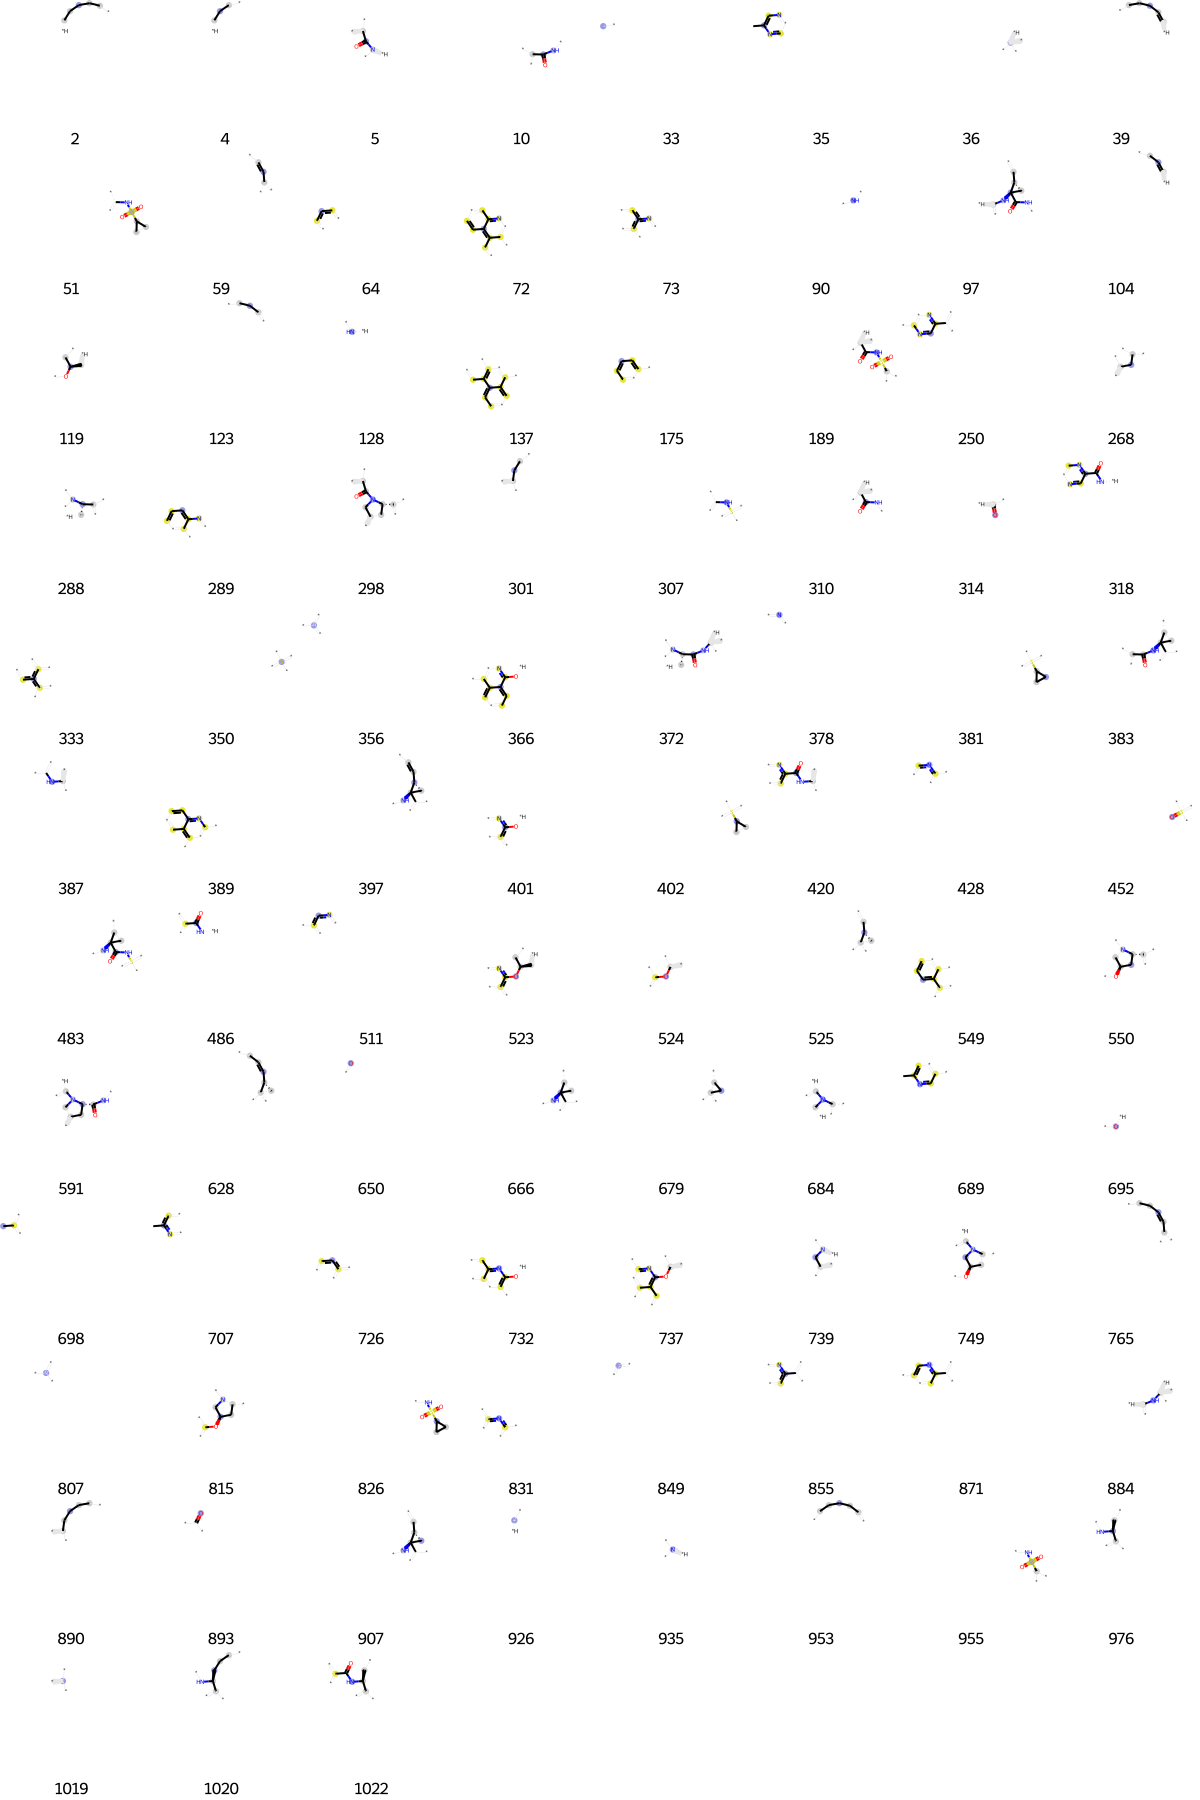

In [2956]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2957]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[33,
 80,
 86,
 171,
 263,
 294,
 332,
 389,
 401,
 416,
 420,
 540,
 591,
 637,
 646,
 650,
 694,
 713,
 731,
 775,
 794,
 807,
 849,
 887,
 893]

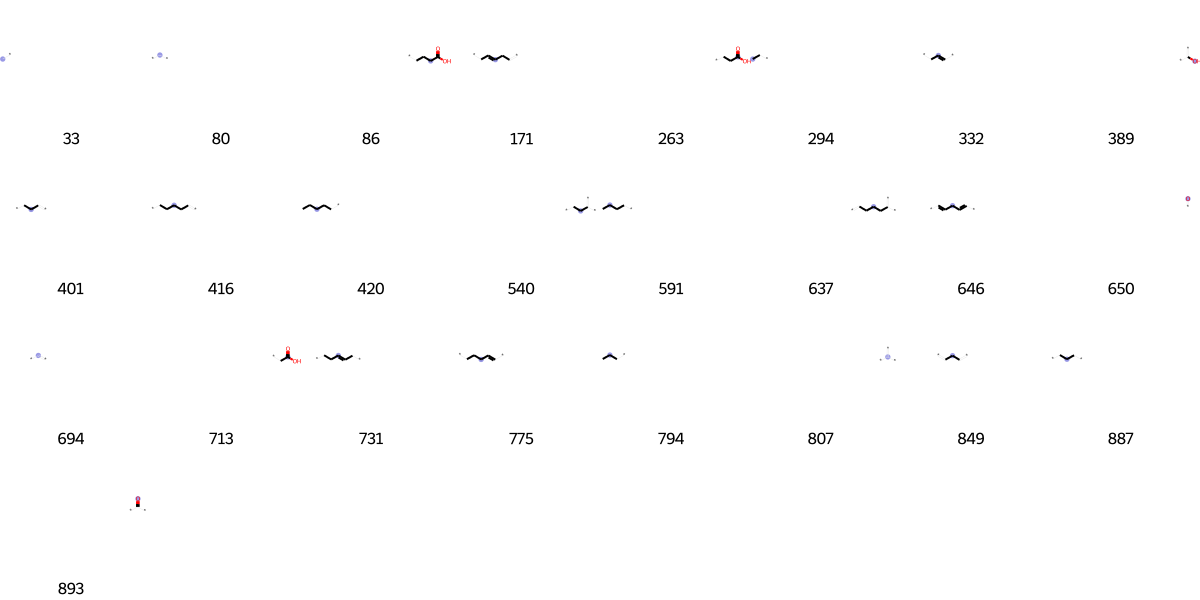

In [2958]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2959]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[4,
 51,
 67,
 114,
 171,
 236,
 279,
 314,
 354,
 356,
 370,
 393,
 429,
 442,
 498,
 619,
 641,
 650,
 714,
 715,
 716,
 726,
 747,
 753,
 783,
 795,
 807,
 809,
 838,
 849,
 875,
 886,
 892,
 893,
 904,
 926,
 939,
 967,
 1019]

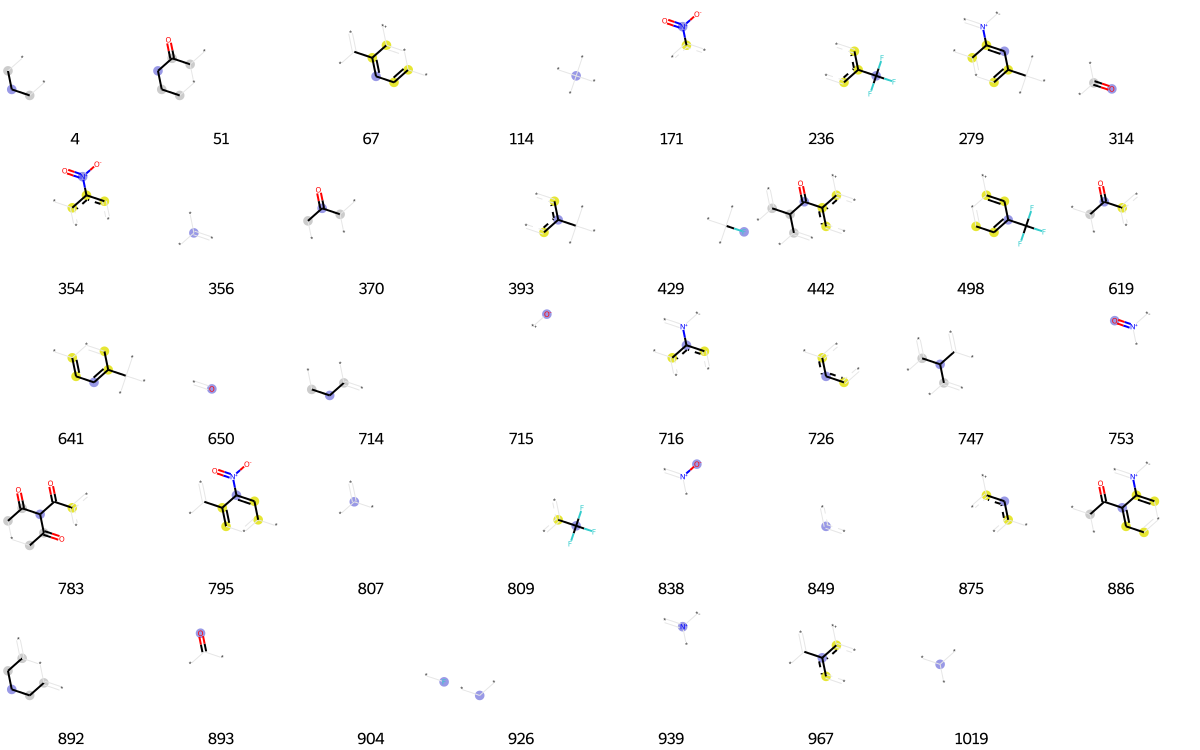

In [2960]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2961]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[36,
 42,
 64,
 80,
 90,
 98,
 138,
 175,
 207,
 216,
 237,
 268,
 301,
 314,
 356,
 389,
 456,
 528,
 551,
 554,
 556,
 612,
 650,
 659,
 713,
 714,
 726,
 730,
 739,
 741,
 747,
 767,
 772,
 784,
 801,
 849,
 858,
 926,
 935,
 973,
 1019]

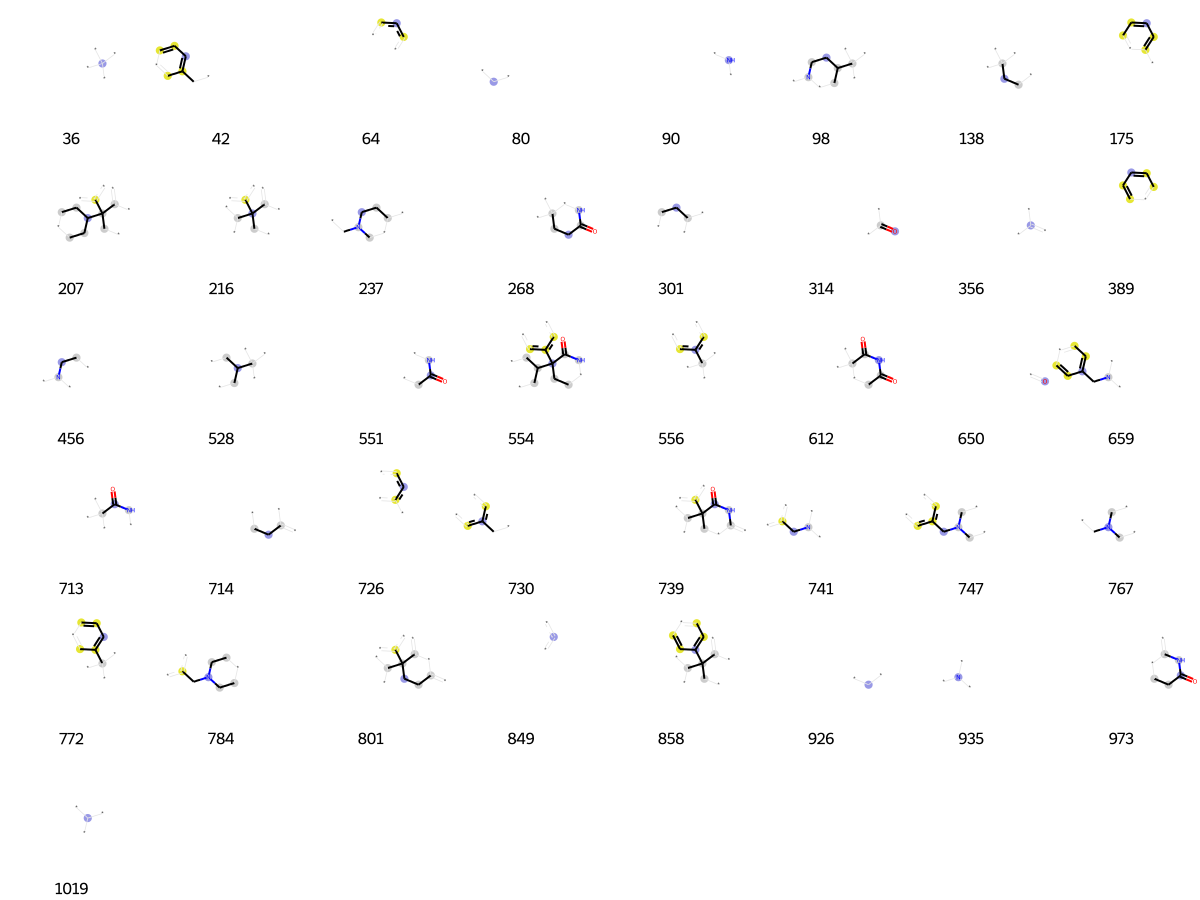

In [2962]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2963]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[25,
 33,
 53,
 72,
 80,
 128,
 180,
 270,
 289,
 294,
 309,
 318,
 356,
 361,
 386,
 486,
 578,
 641,
 650,
 663,
 673,
 694,
 725,
 726,
 745,
 754,
 807,
 843,
 849,
 864,
 881,
 893,
 924,
 932,
 960,
 968,
 1009,
 1023]

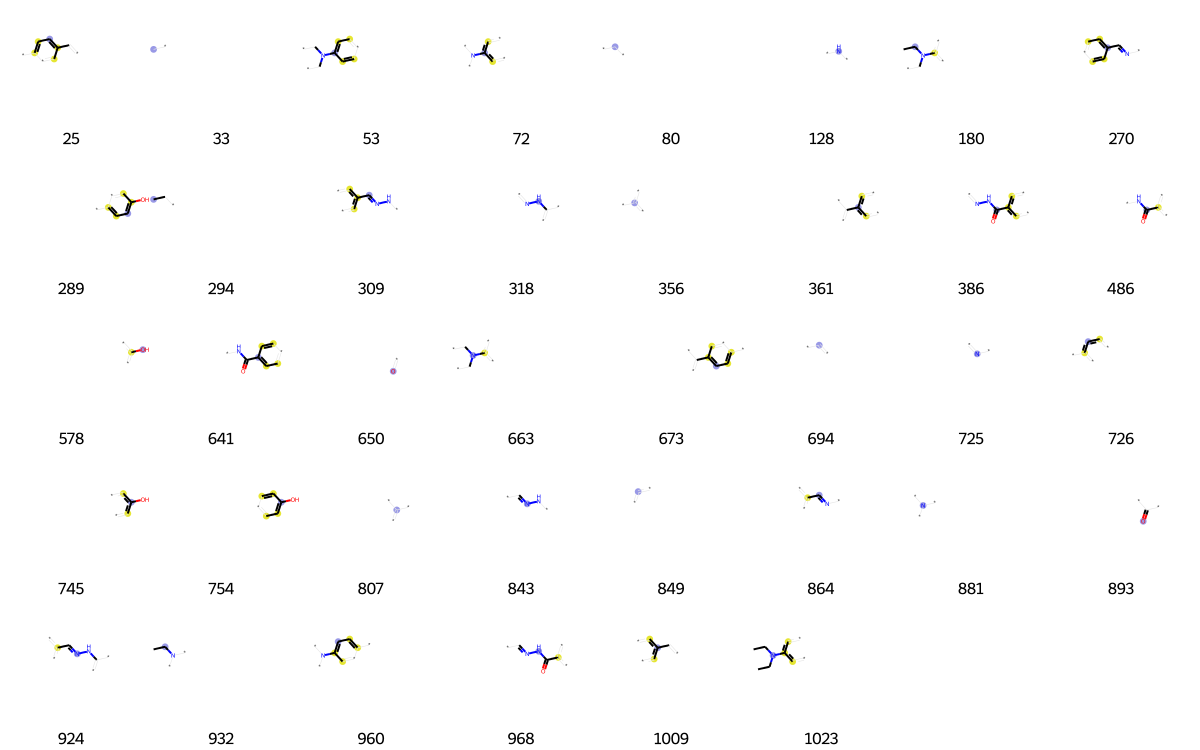

In [2964]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2965]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 116,
 185,
 193,
 202,
 212,
 216,
 356,
 366,
 380,
 552,
 561,
 578,
 659,
 723,
 807,
 849,
 875,
 884,
 894]

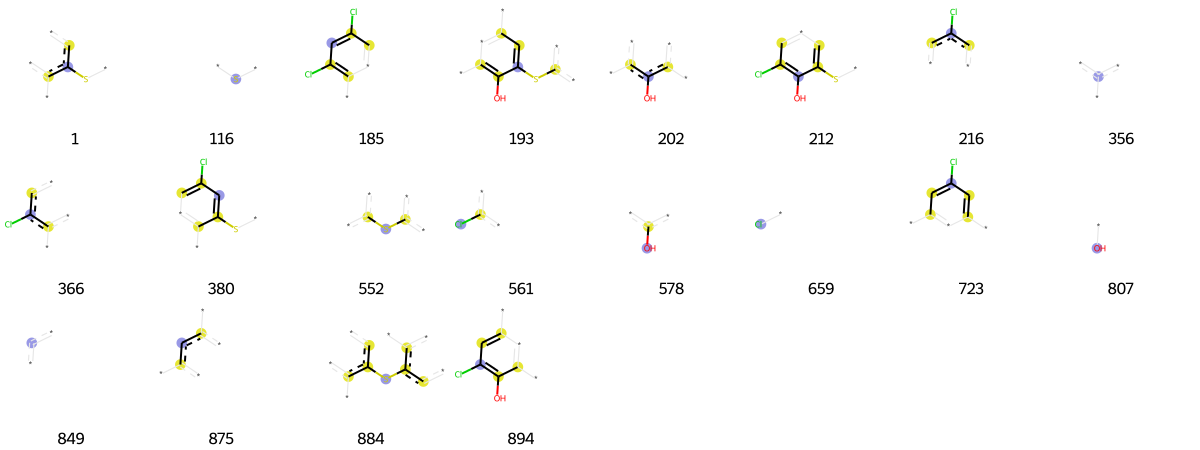

In [2966]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2967]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 33,
 61,
 128,
 157,
 164,
 191,
 252,
 283,
 319,
 350,
 356,
 378,
 399,
 428,
 452,
 458,
 491,
 500,
 511,
 558,
 562,
 643,
 650,
 668,
 692,
 698,
 715,
 726,
 742,
 787,
 795,
 831,
 842,
 843,
 849,
 862,
 876,
 891,
 906,
 907,
 917,
 935,
 936,
 955,
 980]

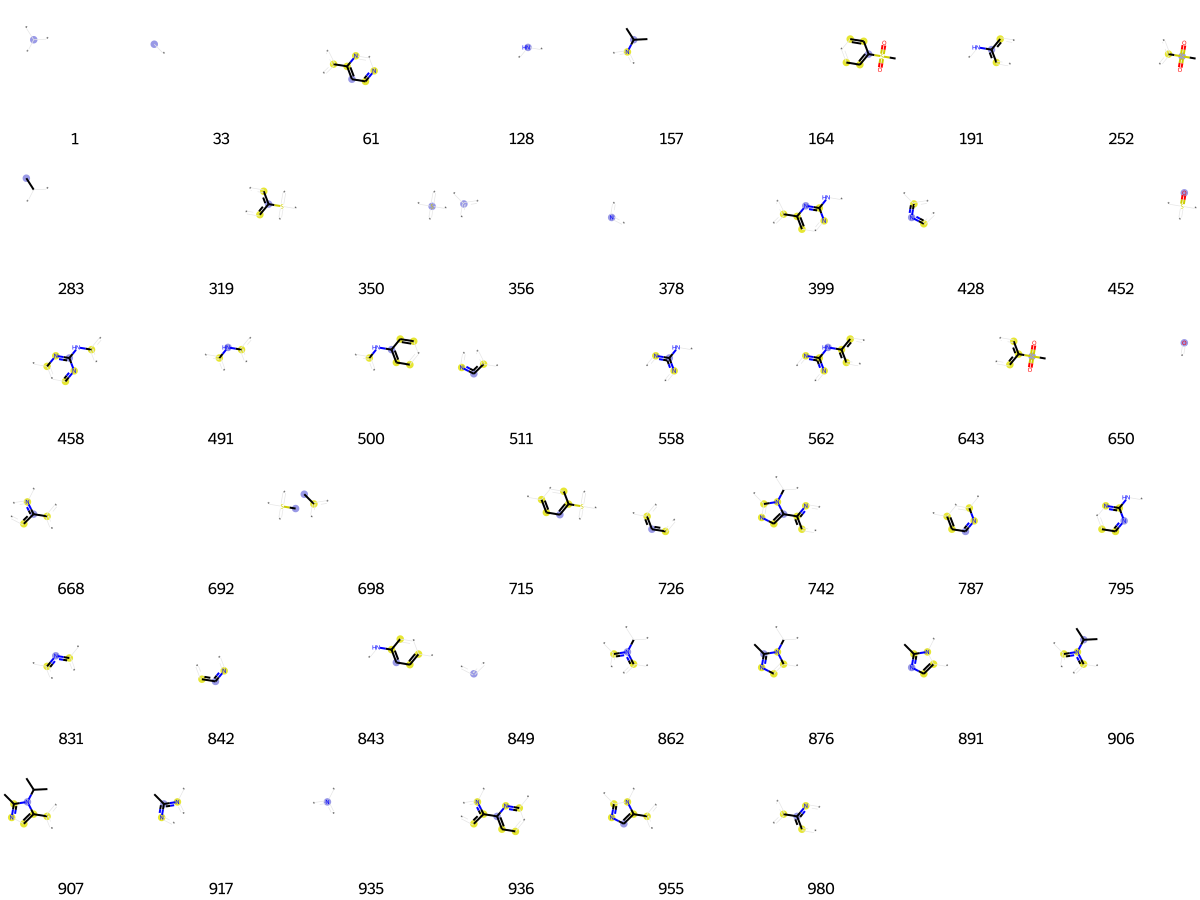

In [2968]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2969]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[15,
 31,
 33,
 37,
 49,
 64,
 80,
 139,
 147,
 148,
 171,
 176,
 205,
 207,
 214,
 250,
 265,
 284,
 301,
 329,
 338,
 356,
 376,
 463,
 469,
 516,
 564,
 586,
 614,
 618,
 650,
 694,
 695,
 715,
 726,
 729,
 753,
 772,
 785,
 807,
 809,
 835,
 837,
 838,
 849,
 875,
 881,
 893,
 916,
 926,
 939,
 980,
 1009,
 1017,
 1019]

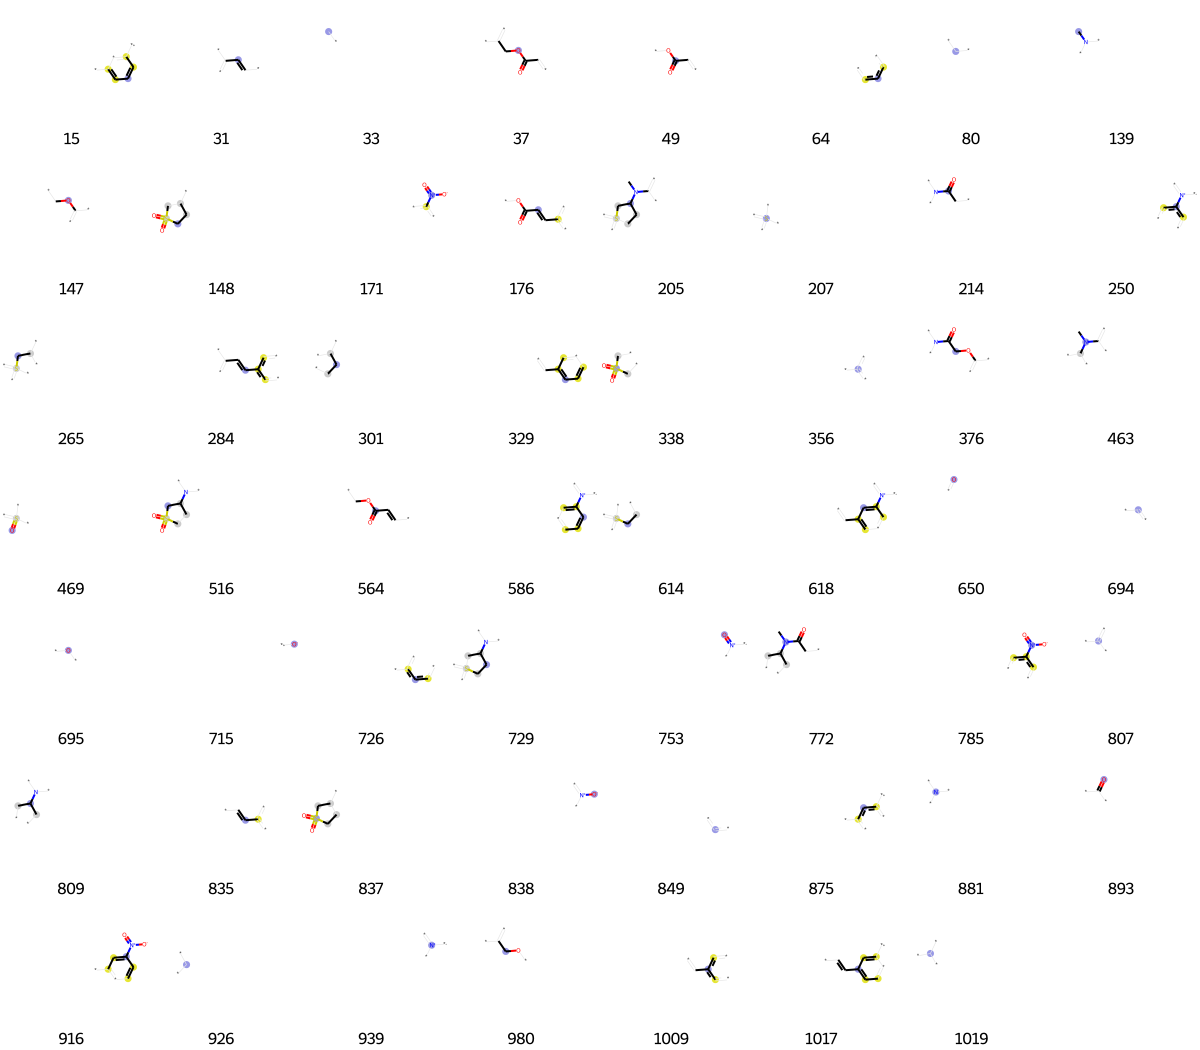

In [2970]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2971]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 3,
 15,
 33,
 60,
 63,
 64,
 73,
 80,
 114,
 133,
 139,
 148,
 155,
 175,
 237,
 275,
 284,
 333,
 341,
 356,
 378,
 389,
 401,
 419,
 442,
 477,
 491,
 512,
 538,
 549,
 557,
 600,
 607,
 652,
 693,
 695,
 726,
 728,
 732,
 766,
 777,
 794,
 797,
 807,
 818,
 819,
 831,
 841,
 849,
 875,
 881,
 884,
 909,
 915,
 927,
 961]

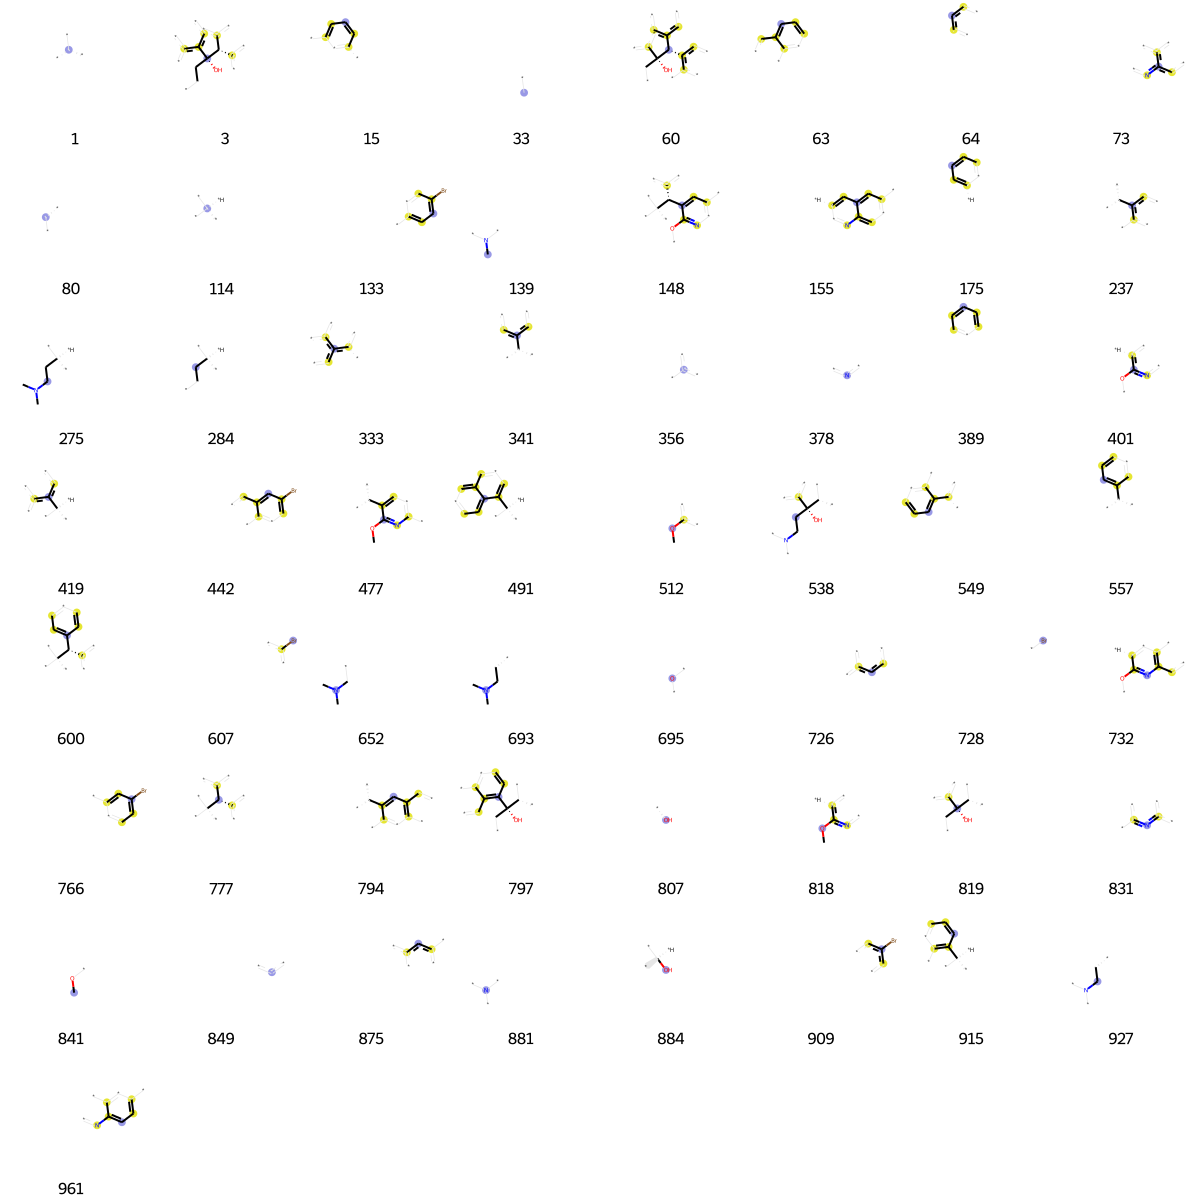

In [2972]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2973]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[1,
 80,
 117,
 147,
 169,
 227,
 266,
 287,
 389,
 496,
 650,
 713,
 807,
 885,
 893,
 981,
 1014]

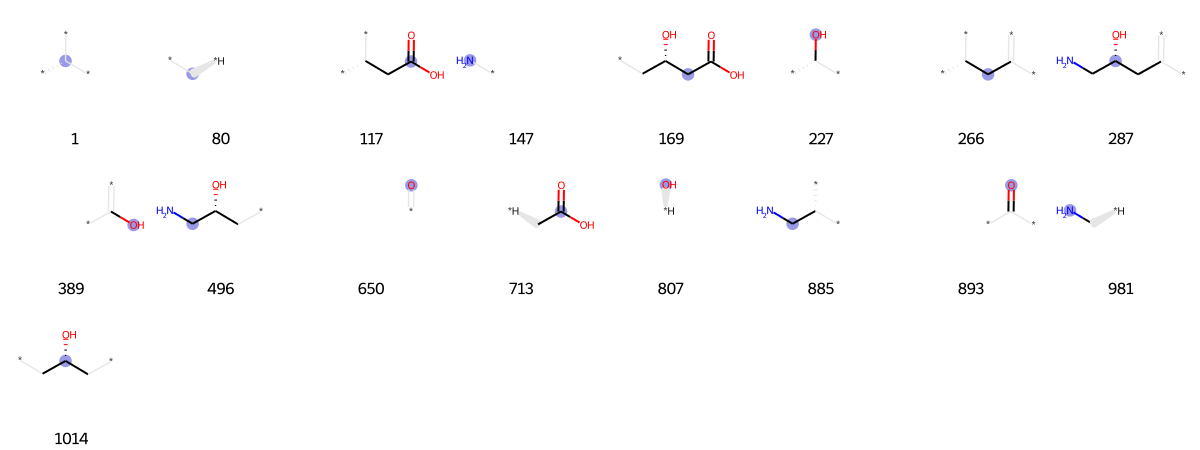

In [2974]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2975]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[68,
 171,
 199,
 202,
 250,
 354,
 356,
 364,
 536,
 578,
 583,
 650,
 715,
 716,
 753,
 785,
 807,
 816,
 838,
 839,
 849,
 875,
 939]

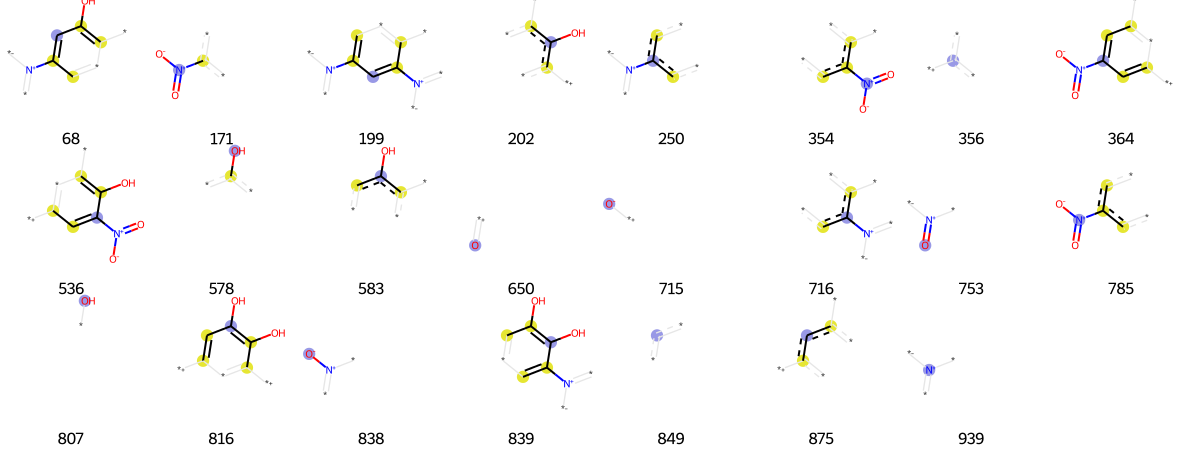

In [2976]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2977]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[33,
 73,
 80,
 82,
 92,
 128,
 140,
 147,
 233,
 312,
 322,
 333,
 356,
 378,
 427,
 512,
 558,
 608,
 623,
 695,
 698,
 709,
 715,
 718,
 726,
 781,
 792,
 807,
 831,
 841,
 848,
 849,
 875,
 894,
 948,
 976,
 1019]

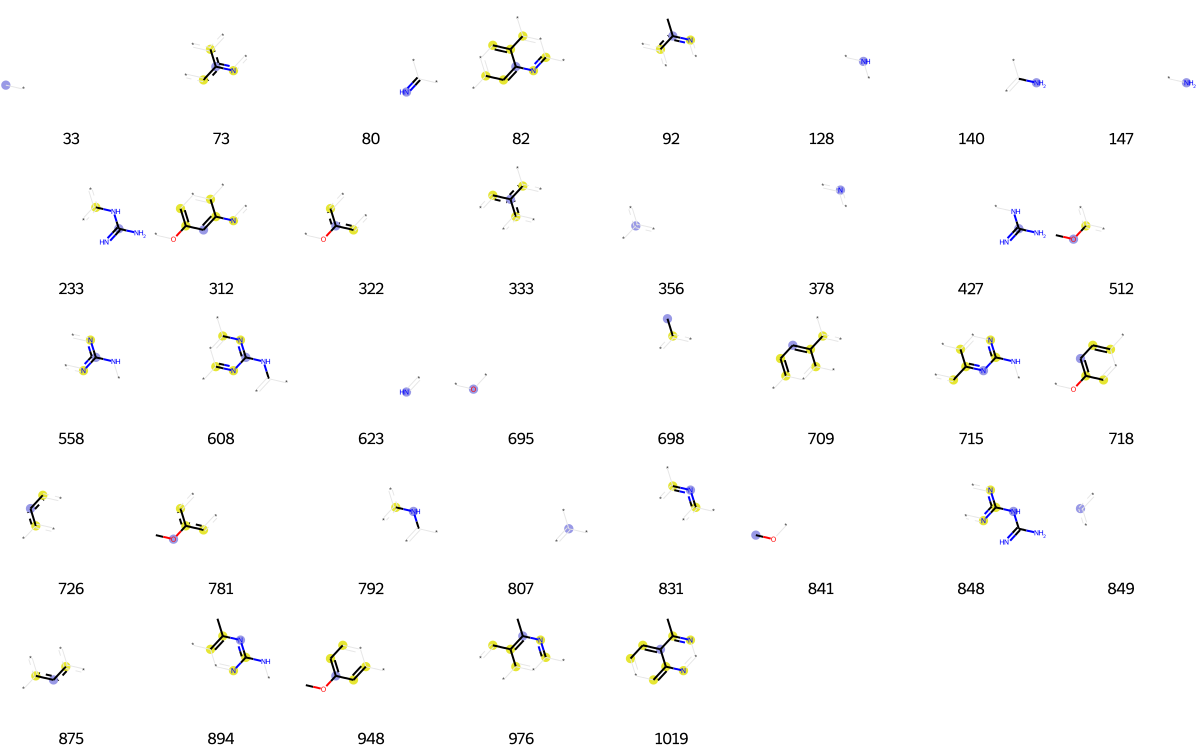

In [2978]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2979]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[42,
 46,
 73,
 165,
 216,
 231,
 271,
 333,
 356,
 361,
 378,
 407,
 428,
 456,
 480,
 482,
 484,
 487,
 497,
 561,
 565,
 613,
 631,
 650,
 659,
 673,
 709,
 726,
 787,
 807,
 816,
 842,
 849,
 875,
 893,
 898,
 926,
 935,
 942,
 985]

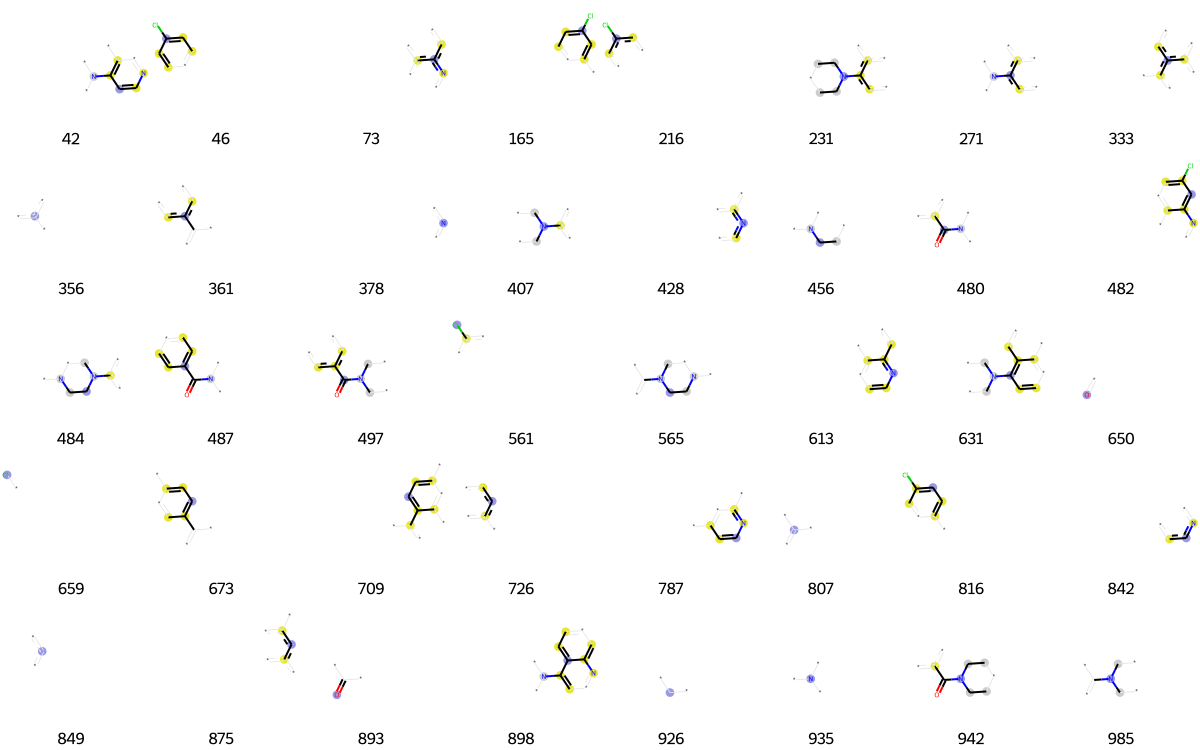

In [2980]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2981]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[32,
 33,
 37,
 58,
 80,
 116,
 136,
 140,
 168,
 233,
 248,
 259,
 322,
 325,
 341,
 356,
 361,
 378,
 425,
 485,
 512,
 518,
 602,
 656,
 664,
 695,
 698,
 718,
 726,
 747,
 762,
 781,
 801,
 808,
 831,
 841,
 849,
 886,
 896,
 917,
 935,
 969,
 989]

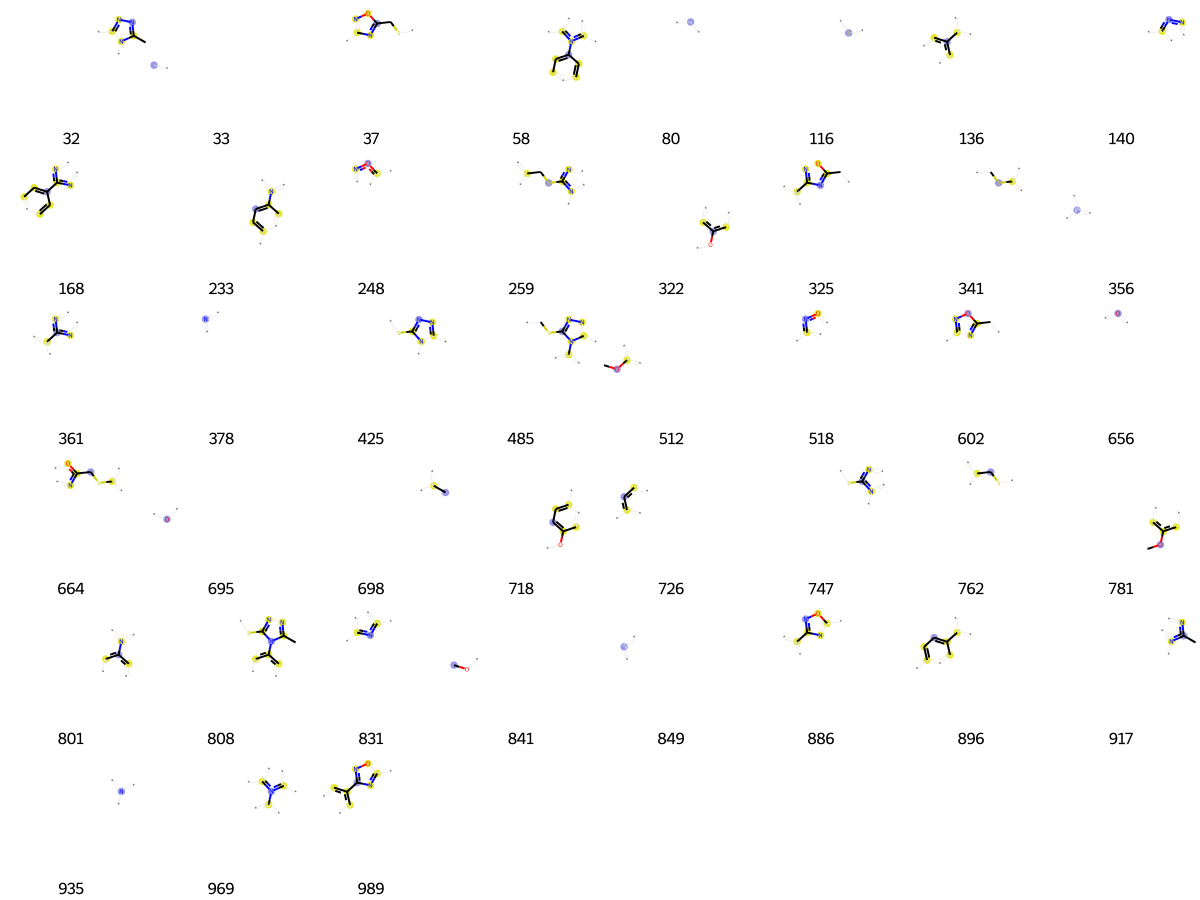

In [2982]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2983]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 7,
 33,
 52,
 80,
 89,
 114,
 116,
 128,
 139,
 227,
 239,
 269,
 322,
 338,
 341,
 356,
 392,
 402,
 499,
 510,
 554,
 603,
 606,
 629,
 632,
 650,
 695,
 705,
 807,
 843,
 849,
 875,
 881,
 893,
 942]

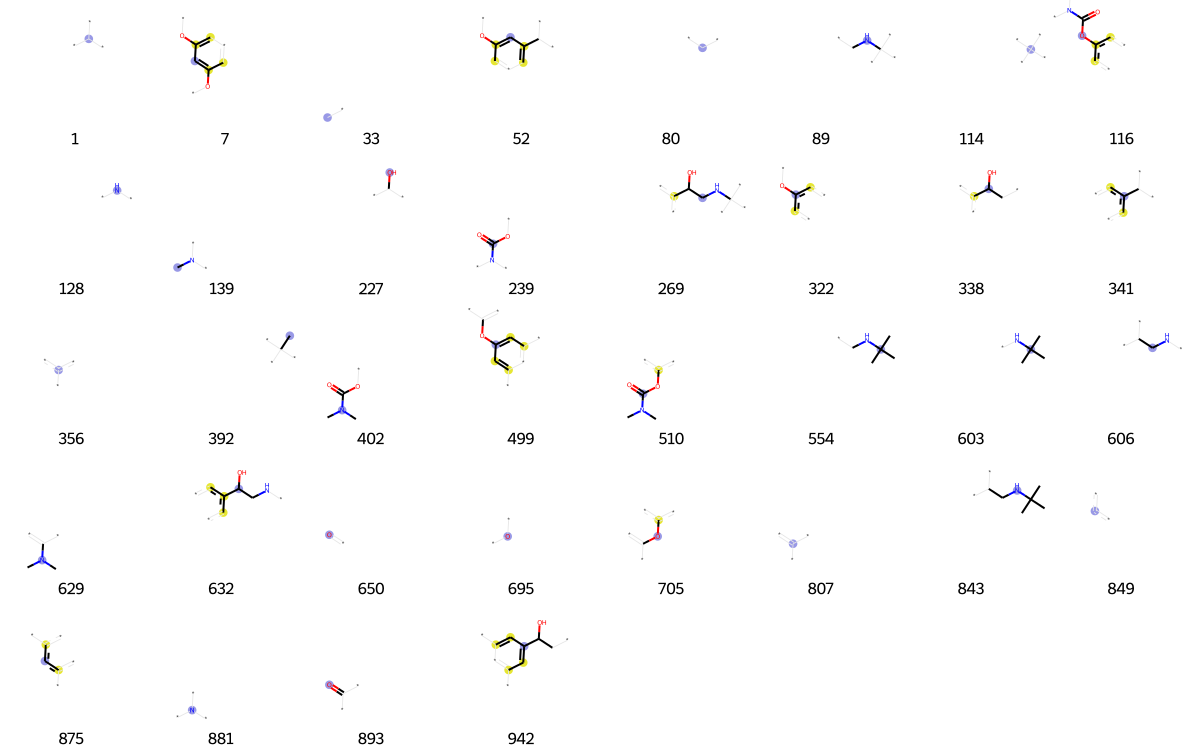

In [2984]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2985]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 9,
 33,
 46,
 69,
 70,
 105,
 114,
 183,
 216,
 283,
 317,
 322,
 356,
 361,
 392,
 545,
 548,
 561,
 585,
 603,
 650,
 659,
 673,
 695,
 718,
 726,
 751,
 770,
 807,
 816,
 849,
 893,
 934,
 954]

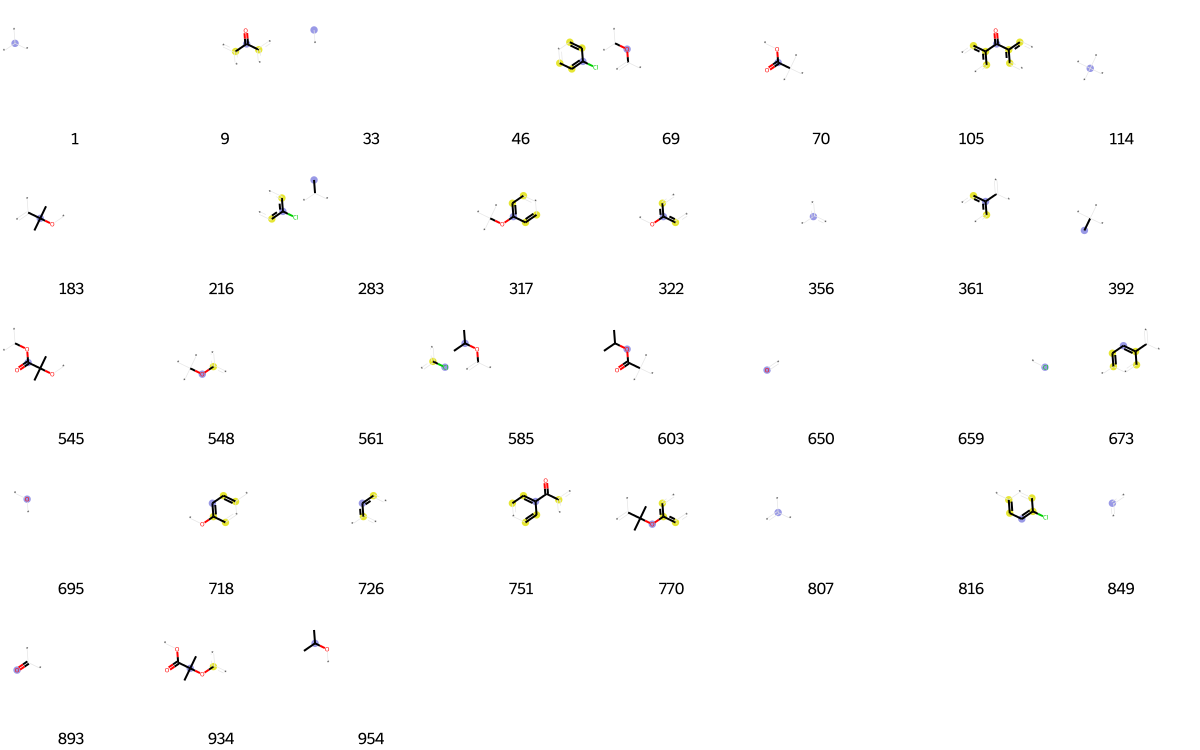

In [2986]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2987]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[8,
 32,
 33,
 36,
 39,
 80,
 90,
 102,
 112,
 119,
 201,
 218,
 231,
 250,
 255,
 271,
 294,
 301,
 305,
 314,
 325,
 333,
 335,
 352,
 356,
 360,
 379,
 381,
 407,
 417,
 440,
 452,
 456,
 523,
 558,
 625,
 650,
 656,
 674,
 709,
 721,
 723,
 726,
 775,
 790,
 793,
 799,
 830,
 839,
 847,
 849,
 852,
 857,
 875,
 886,
 926,
 930,
 935,
 938,
 950,
 951,
 956,
 973,
 990,
 1019]

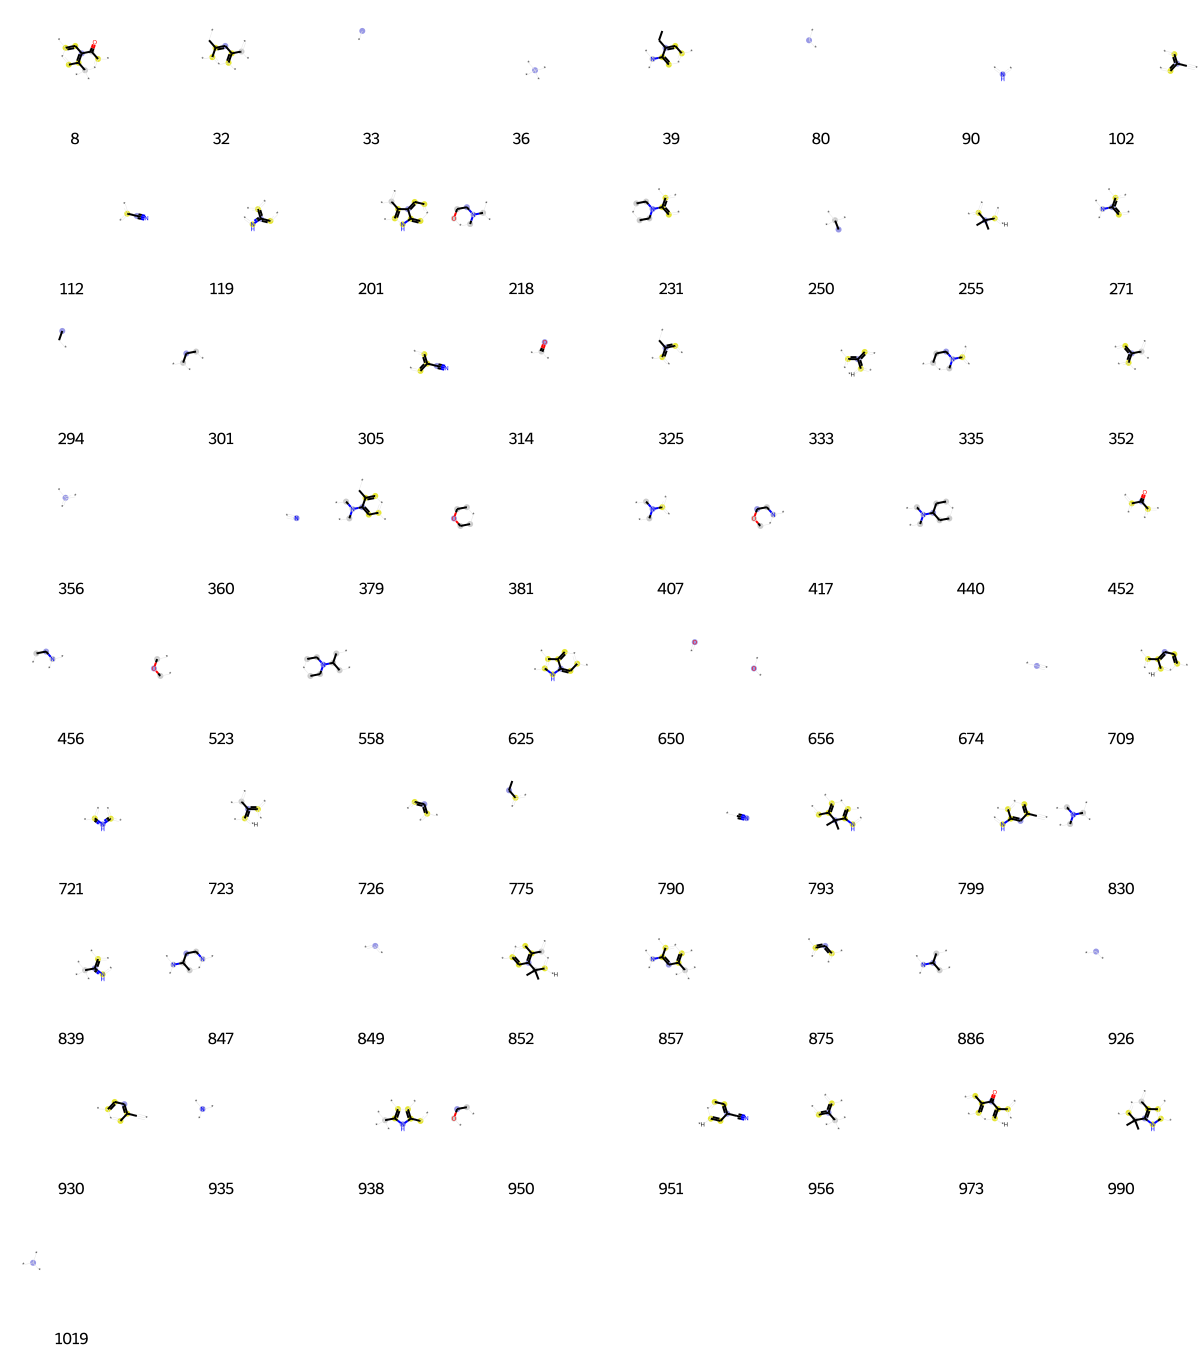

In [2988]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2989]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[3,
 25,
 36,
 47,
 73,
 90,
 193,
 215,
 273,
 281,
 314,
 356,
 358,
 377,
 378,
 421,
 424,
 428,
 531,
 613,
 633,
 650,
 675,
 694,
 726,
 749,
 842,
 849,
 875,
 926,
 961,
 1009,
 1020]

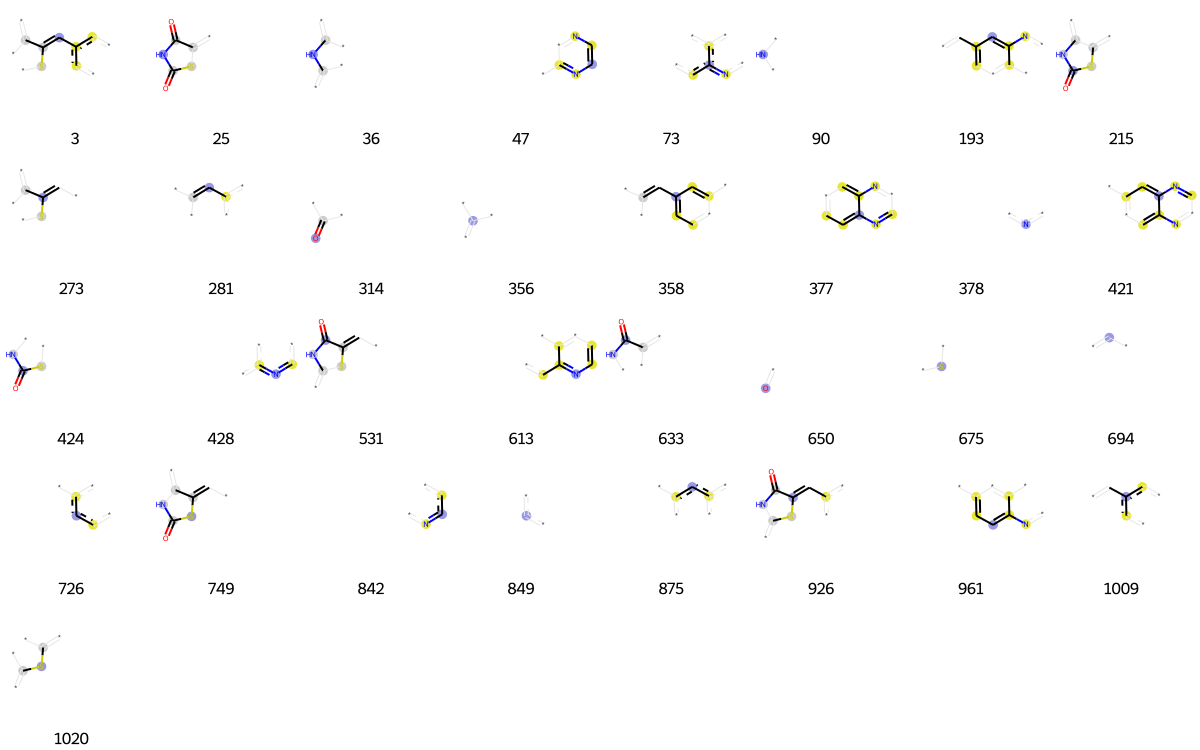

In [2990]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2991]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 15,
 33,
 42,
 64,
 79,
 80,
 114,
 128,
 163,
 236,
 283,
 284,
 294,
 344,
 356,
 393,
 429,
 498,
 514,
 702,
 704,
 726,
 730,
 782,
 809,
 849,
 875,
 904,
 940,
 966,
 993,
 994]

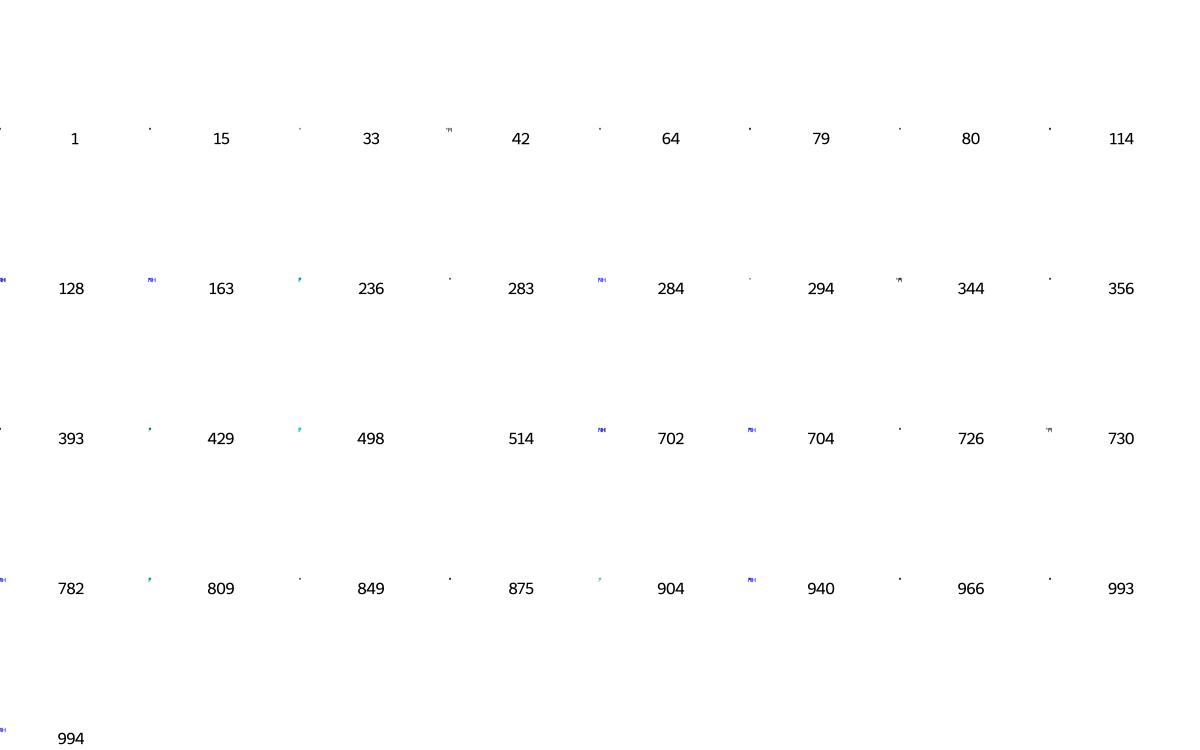

In [2992]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2993]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[13,
 15,
 33,
 36,
 64,
 80,
 90,
 121,
 128,
 138,
 143,
 145,
 147,
 171,
 175,
 250,
 255,
 256,
 297,
 356,
 389,
 440,
 456,
 458,
 473,
 484,
 537,
 556,
 568,
 586,
 627,
 639,
 650,
 653,
 676,
 688,
 695,
 698,
 710,
 715,
 726,
 753,
 767,
 772,
 785,
 807,
 838,
 841,
 849,
 871,
 875,
 878,
 887,
 893,
 906,
 916,
 926,
 935,
 939,
 987,
 1005,
 1019]

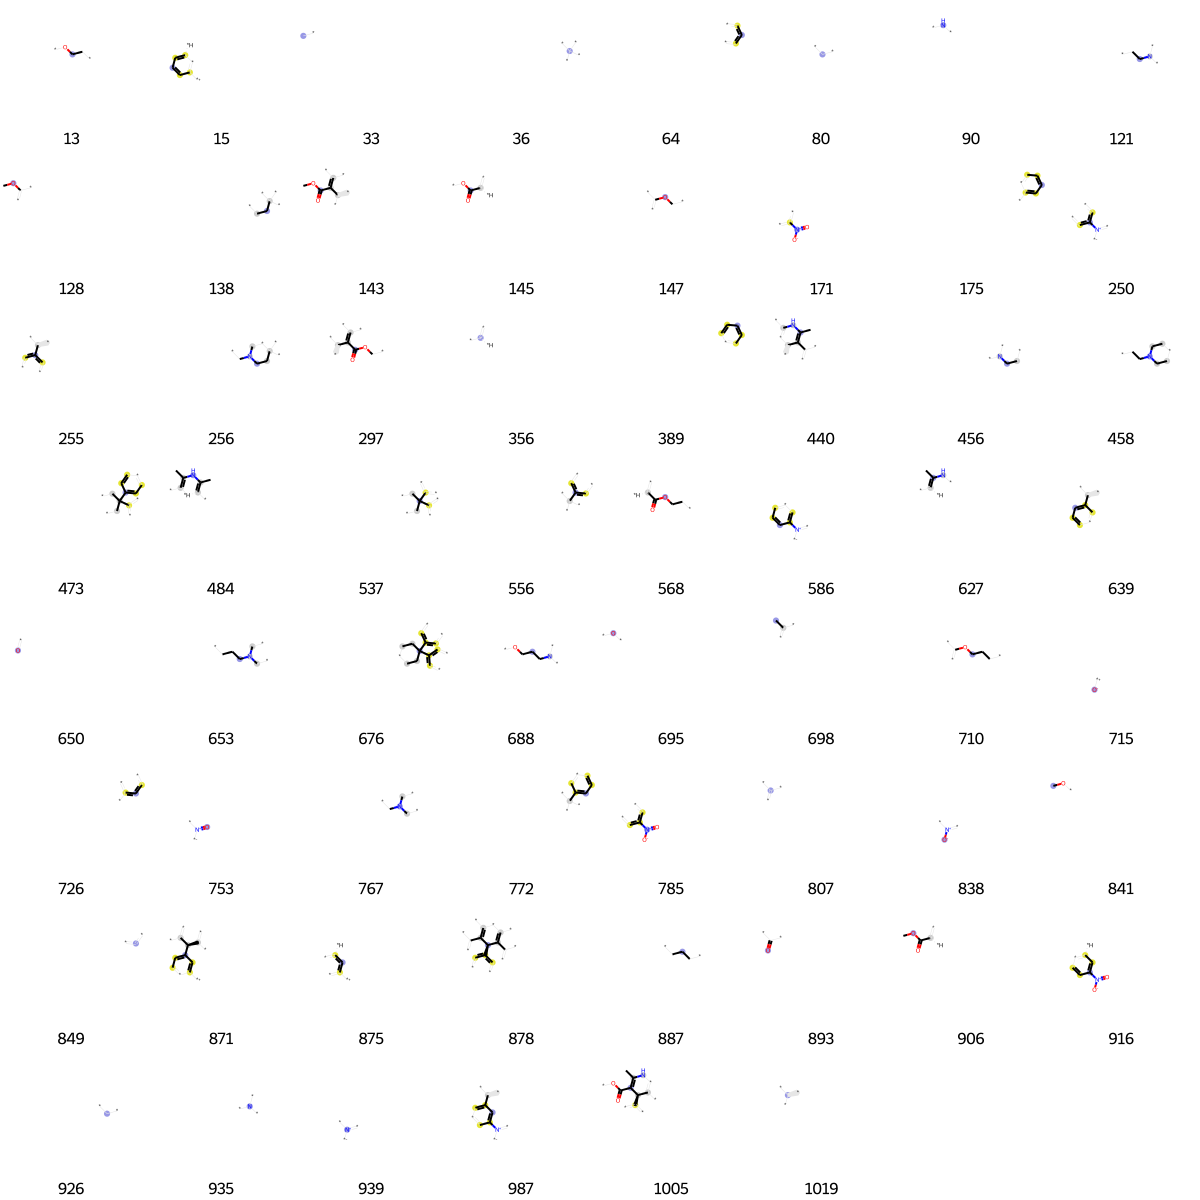

In [2994]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2995]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[88, 180, 202, 356, 578, 582, 661, 676, 807, 849, 875, 877, 947, 981]

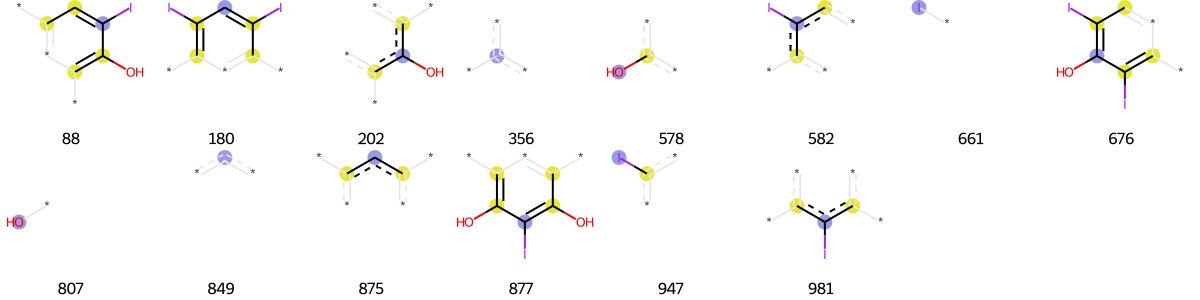

In [2996]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2997]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[4,
 5,
 20,
 36,
 59,
 84,
 87,
 117,
 237,
 239,
 258,
 301,
 314,
 326,
 356,
 426,
 456,
 460,
 547,
 551,
 604,
 650,
 656,
 666,
 679,
 735,
 736,
 779,
 805,
 843,
 849,
 863,
 890,
 926,
 935,
 947,
 974,
 1019]

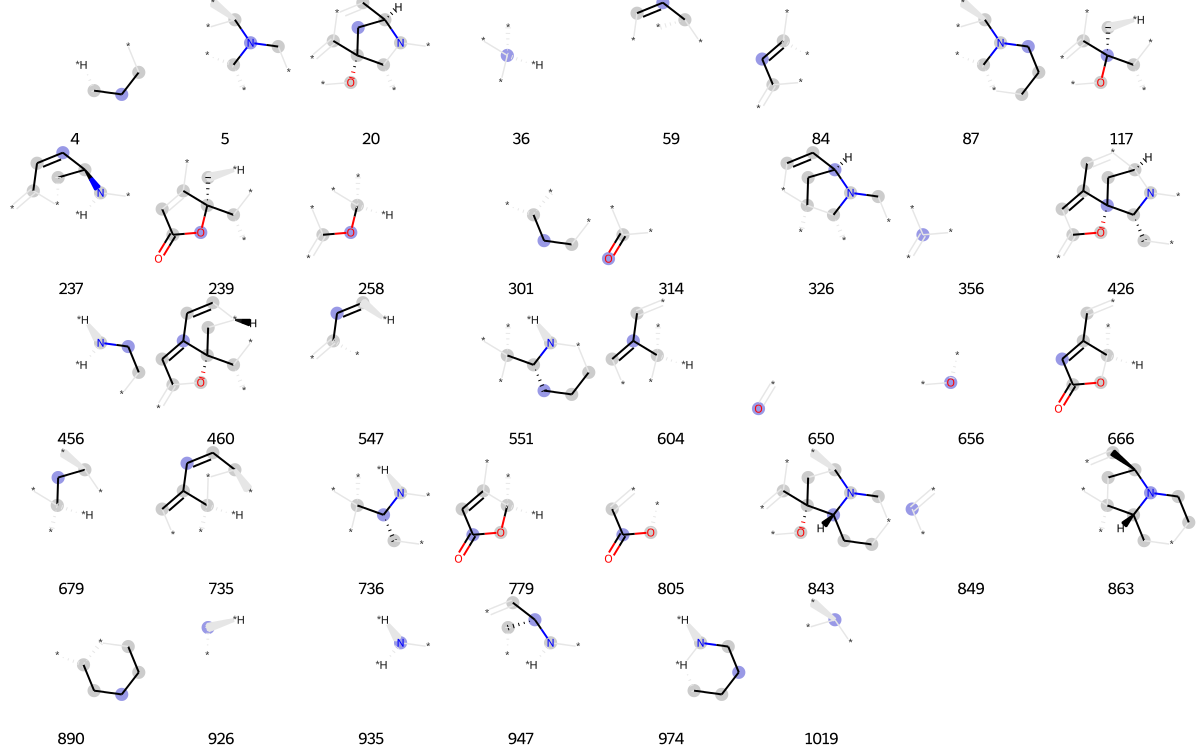

In [2998]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2999]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[13,
 19,
 33,
 46,
 64,
 70,
 80,
 114,
 145,
 147,
 183,
 216,
 219,
 317,
 322,
 356,
 361,
 378,
 392,
 437,
 498,
 510,
 511,
 548,
 561,
 562,
 568,
 579,
 650,
 659,
 695,
 711,
 718,
 726,
 770,
 807,
 816,
 842,
 849,
 881,
 893,
 934,
 938,
 961]

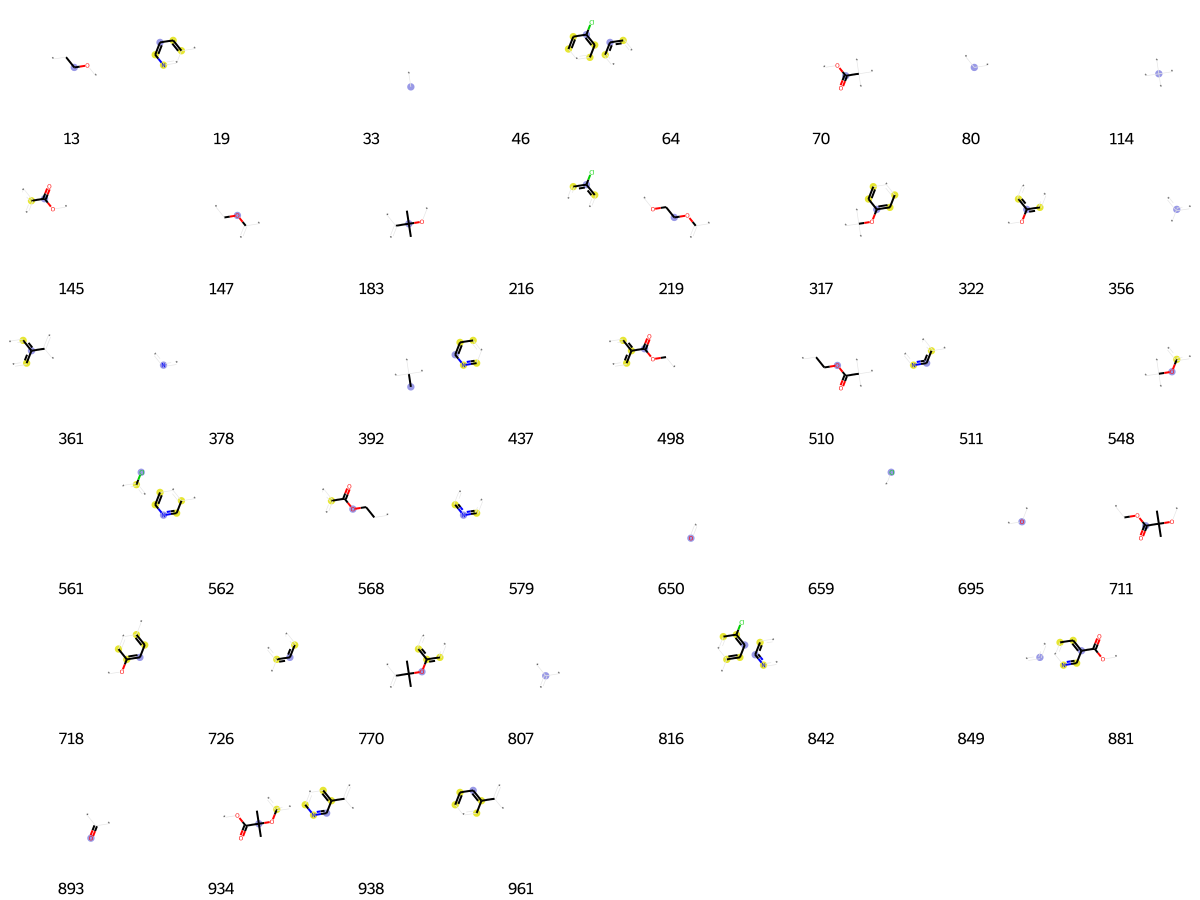

In [3000]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [3001]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[1,
 3,
 15,
 33,
 36,
 54,
 64,
 72,
 73,
 78,
 80,
 83,
 90,
 119,
 129,
 138,
 139,
 175,
 212,
 219,
 223,
 253,
 278,
 283,
 289,
 299,
 343,
 356,
 362,
 378,
 386,
 413,
 428,
 463,
 506,
 514,
 515,
 525,
 535,
 550,
 569,
 635,
 636,
 642,
 644,
 646,
 650,
 677,
 694,
 695,
 699,
 714,
 720,
 721,
 726,
 733,
 759,
 795,
 807,
 831,
 841,
 849,
 875,
 881,
 887,
 893,
 904,
 921,
 926,
 927,
 980,
 1005,
 1019]

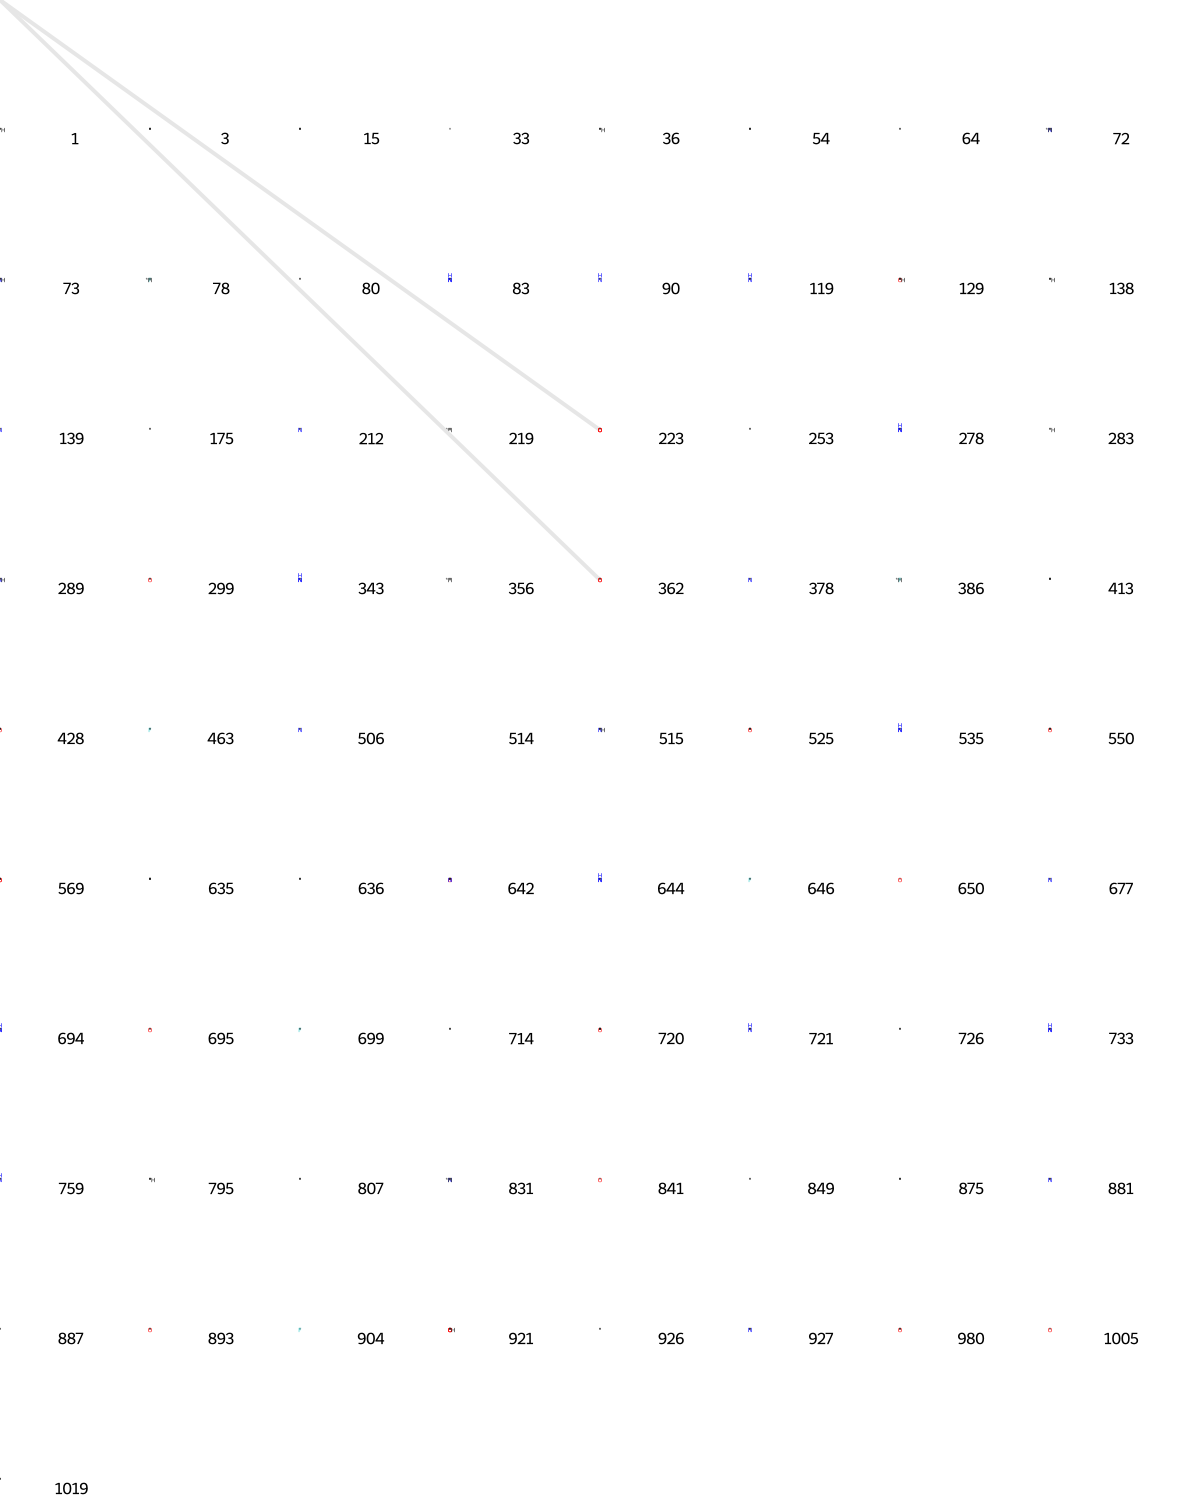

In [3002]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [3003]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[15,
 64,
 298,
 314,
 352,
 356,
 447,
 452,
 578,
 583,
 587,
 650,
 675,
 723,
 726,
 807,
 849,
 901,
 984]

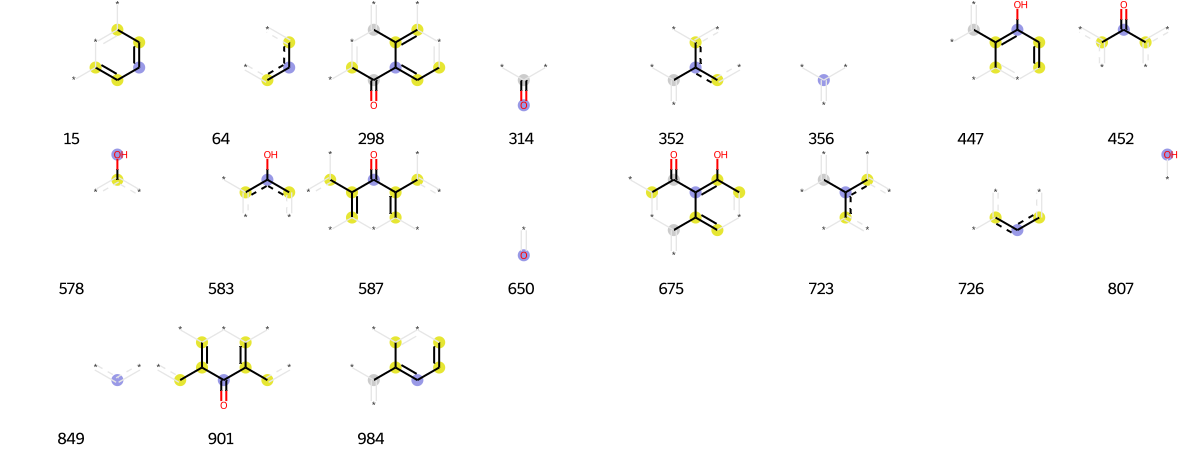

In [3004]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [3005]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[19,
 42,
 62,
 64,
 80,
 116,
 134,
 341,
 356,
 378,
 428,
 437,
 448,
 463,
 511,
 562,
 575,
 579,
 580,
 586,
 645,
 726,
 730,
 762,
 842,
 849]

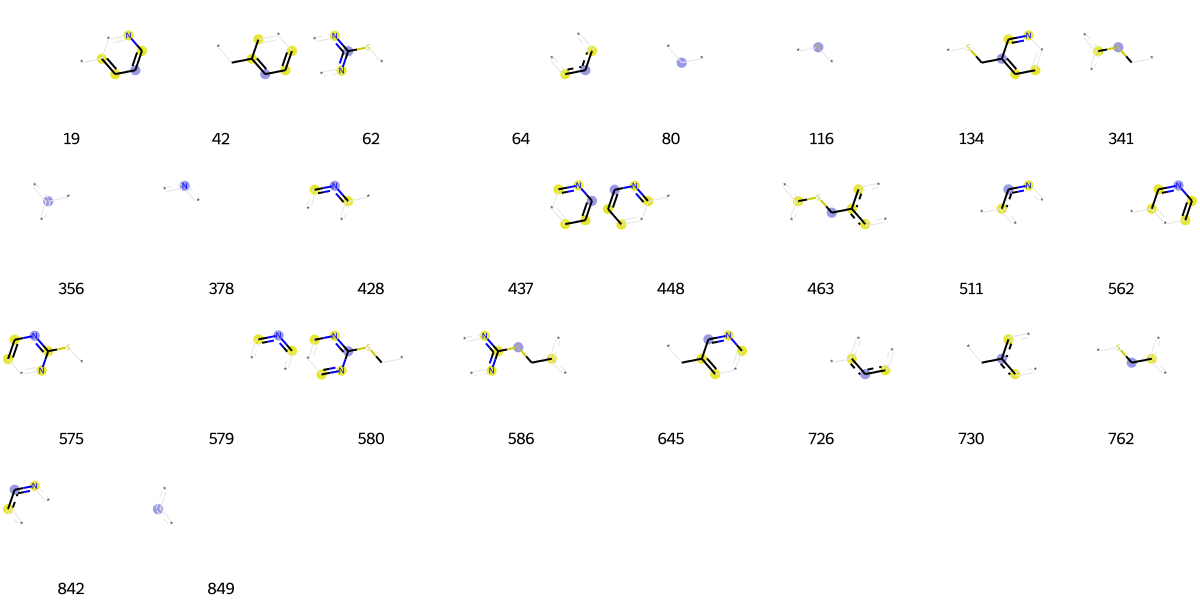

In [3006]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [3007]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[33,
 64,
 80,
 96,
 128,
 147,
 175,
 184,
 191,
 214,
 251,
 259,
 271,
 281,
 294,
 302,
 356,
 390,
 397,
 461,
 540,
 552,
 561,
 620,
 623,
 650,
 675,
 695,
 698,
 700,
 726,
 734,
 744,
 792,
 807,
 843,
 849,
 852,
 875,
 881,
 893,
 917,
 927,
 932,
 935,
 949,
 957,
 972,
 1009,
 1020]

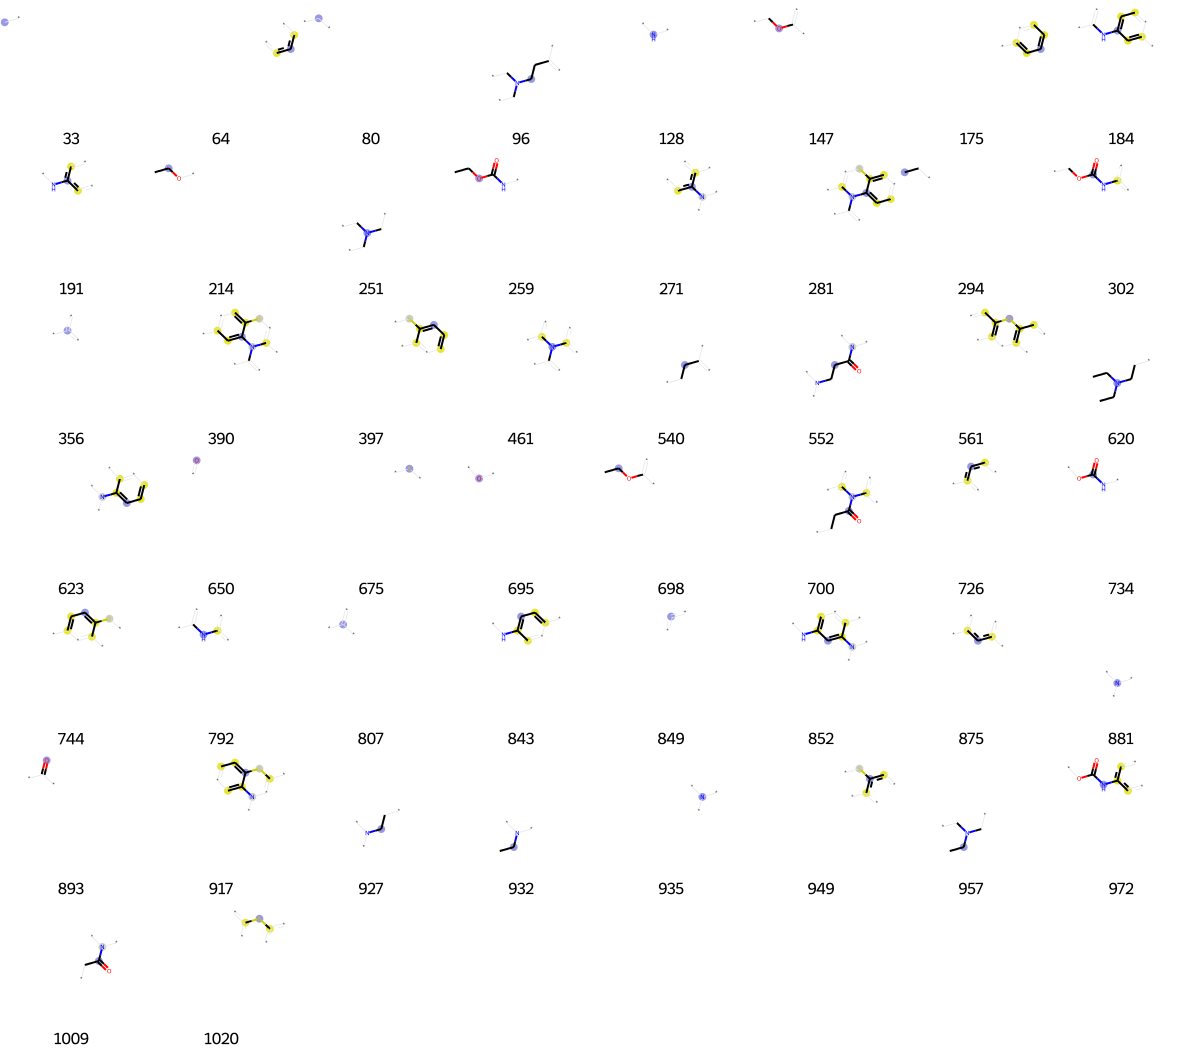

In [3008]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [3009]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 19,
 33,
 42,
 54,
 64,
 72,
 139,
 145,
 209,
 322,
 356,
 422,
 449,
 460,
 474,
 579,
 621,
 650,
 656,
 659,
 682,
 695,
 705,
 718,
 726,
 730,
 759,
 787,
 807,
 849,
 866,
 867,
 881,
 893,
 902,
 914,
 960]

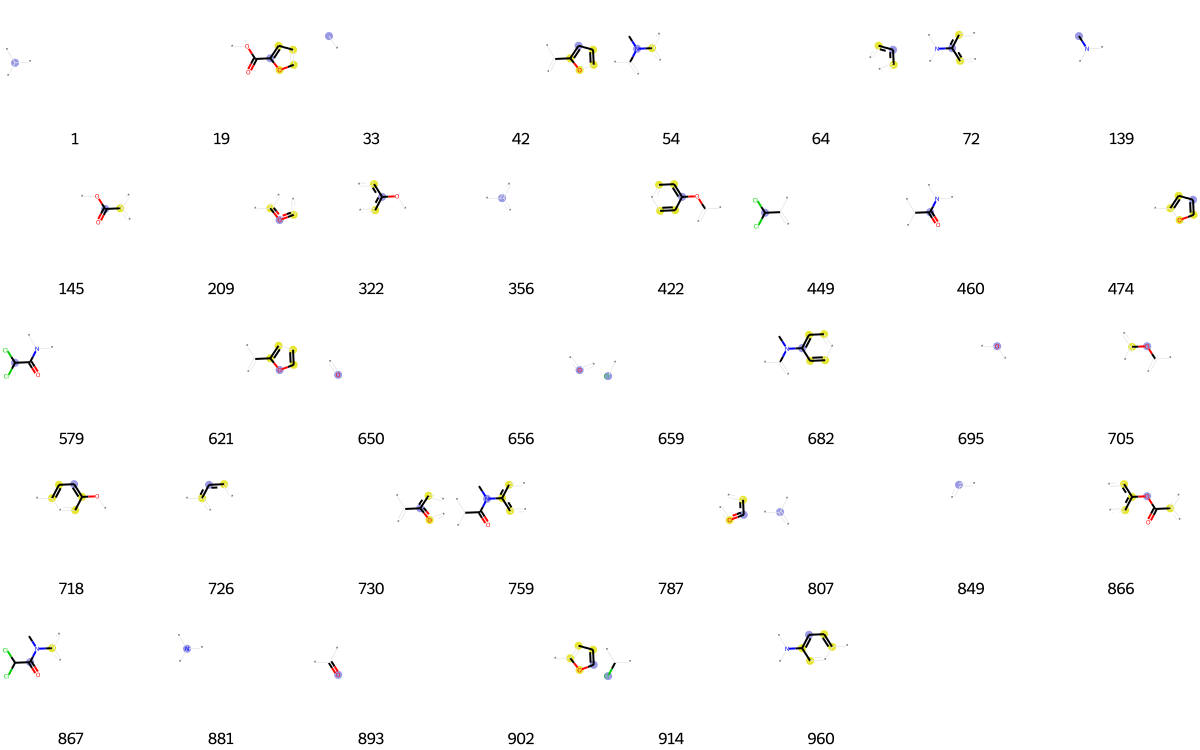

In [3010]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [3011]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[13,
 33,
 64,
 70,
 80,
 102,
 114,
 119,
 121,
 175,
 207,
 212,
 240,
 294,
 295,
 301,
 356,
 357,
 386,
 389,
 393,
 440,
 448,
 456,
 514,
 650,
 695,
 726,
 741,
 794,
 807,
 849,
 870,
 893,
 900,
 926,
 935,
 959,
 993,
 1019]

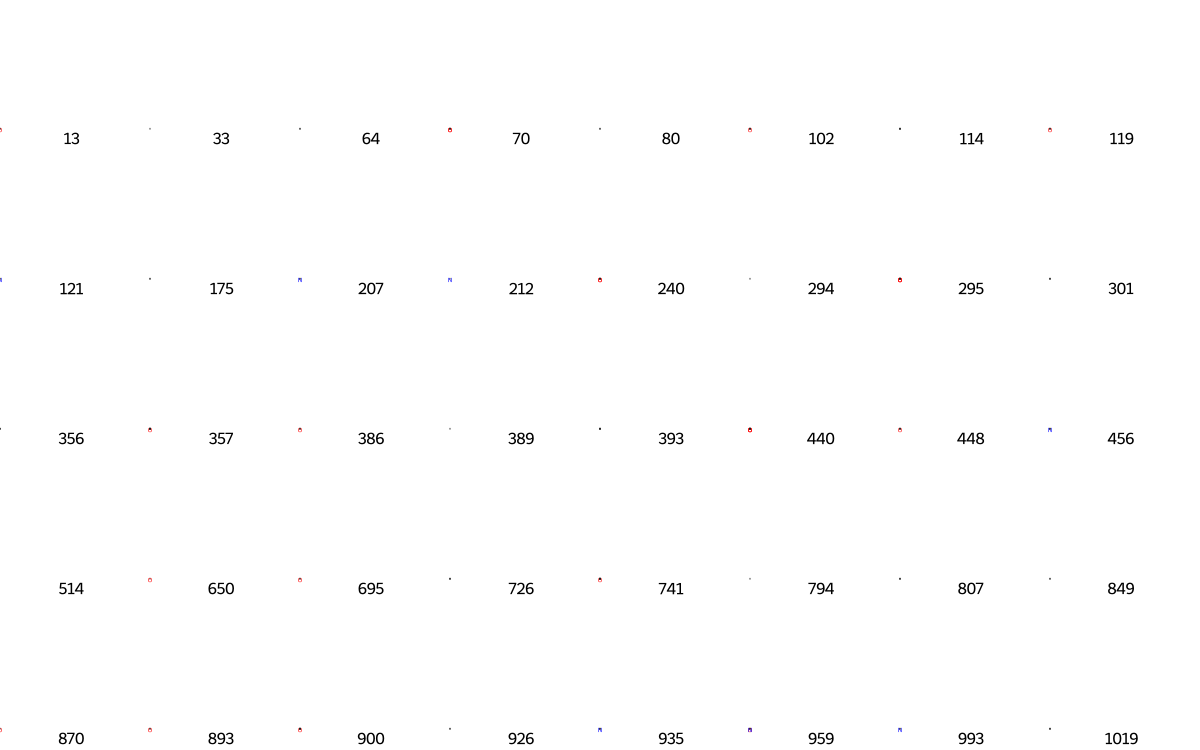

In [3012]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [3013]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[42,
 64,
 80,
 90,
 107,
 128,
 138,
 147,
 175,
 216,
 246,
 298,
 356,
 378,
 389,
 401,
 409,
 428,
 433,
 637,
 688,
 695,
 700,
 713,
 726,
 730,
 745,
 806,
 831,
 833,
 834,
 849,
 934,
 983,
 1018]

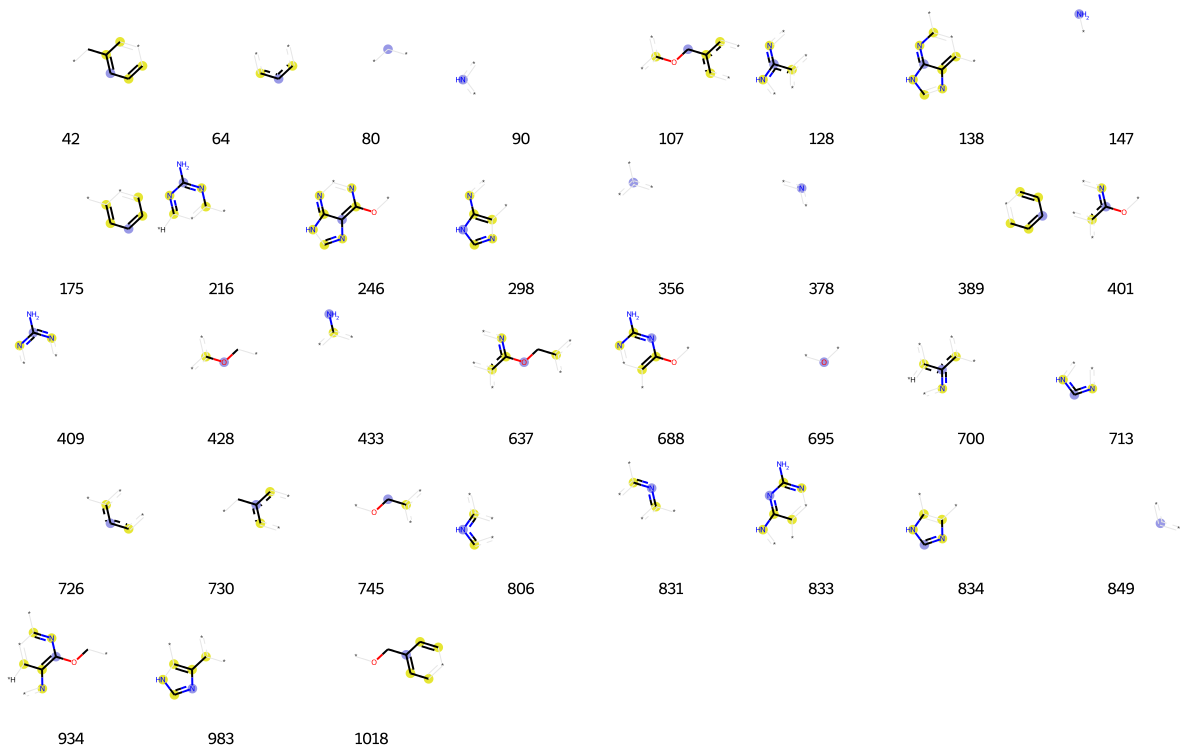

In [3014]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [3015]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[2,
 4,
 33,
 39,
 64,
 73,
 151,
 175,
 263,
 289,
 333,
 356,
 367,
 378,
 389,
 407,
 456,
 527,
 549,
 569,
 641,
 680,
 698,
 726,
 831,
 849,
 875,
 926,
 935,
 964,
 974]

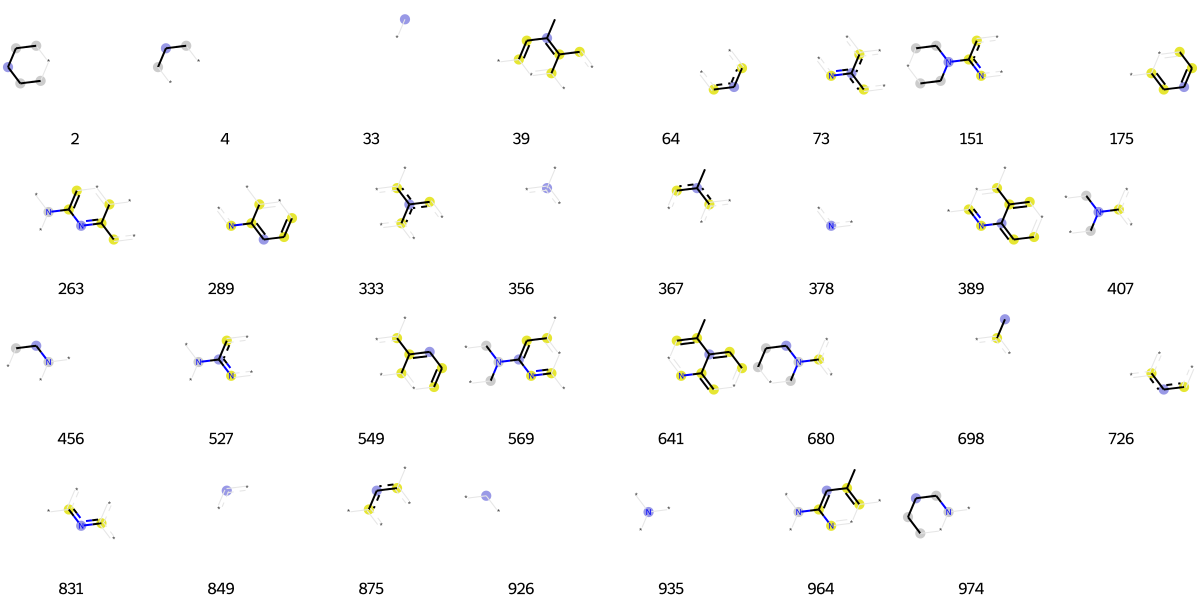

In [3016]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [3017]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 9,
 33,
 79,
 116,
 119,
 162,
 171,
 305,
 354,
 356,
 386,
 419,
 463,
 543,
 552,
 555,
 646,
 649,
 650,
 665,
 675,
 699,
 715,
 716,
 726,
 745,
 753,
 754,
 796,
 807,
 816,
 838,
 849,
 875,
 893,
 904,
 939,
 946,
 958,
 1017]

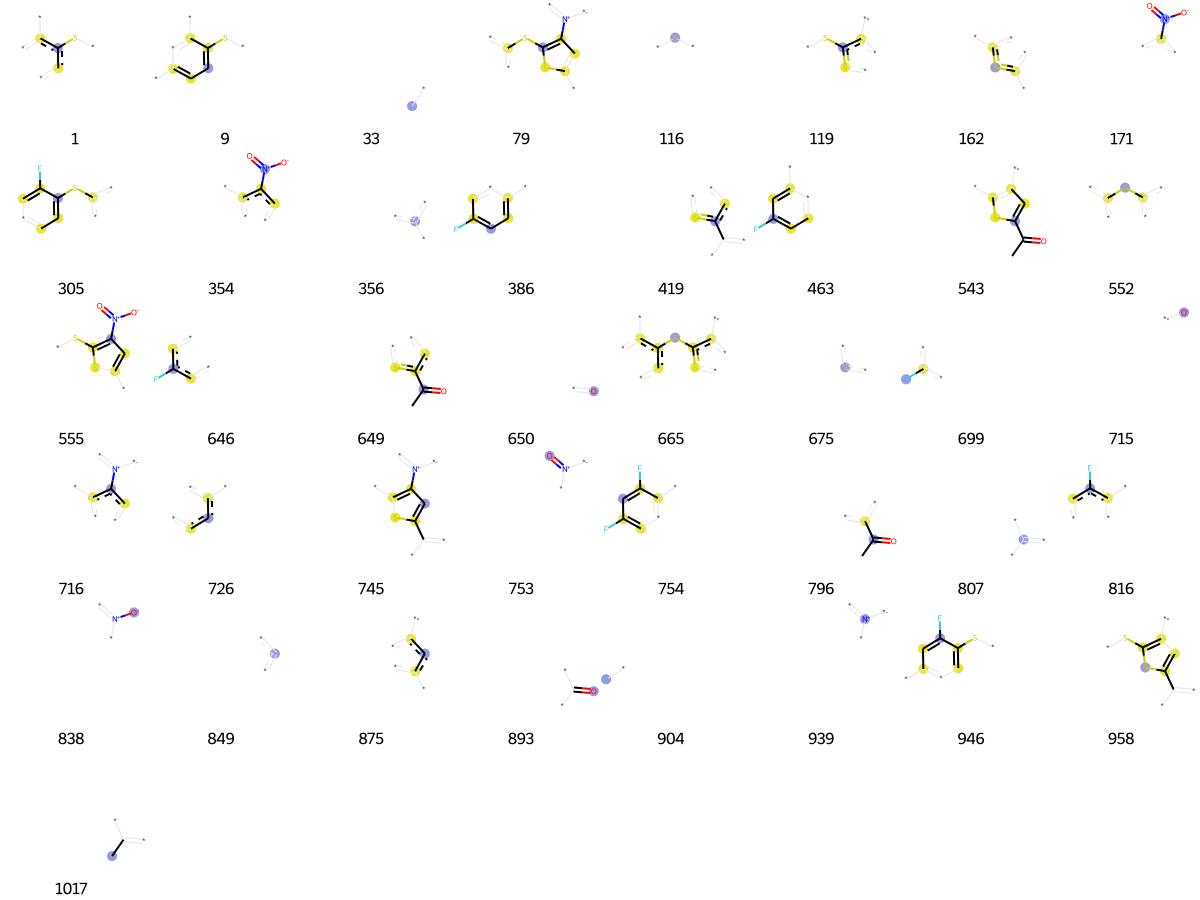

In [3018]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [3019]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[8,
 13,
 19,
 64,
 80,
 128,
 197,
 226,
 265,
 356,
 361,
 378,
 426,
 437,
 486,
 511,
 562,
 579,
 650,
 667,
 692,
 695,
 715,
 726,
 753,
 766,
 807,
 838,
 842,
 849,
 893,
 931,
 938,
 939,
 961,
 1008]

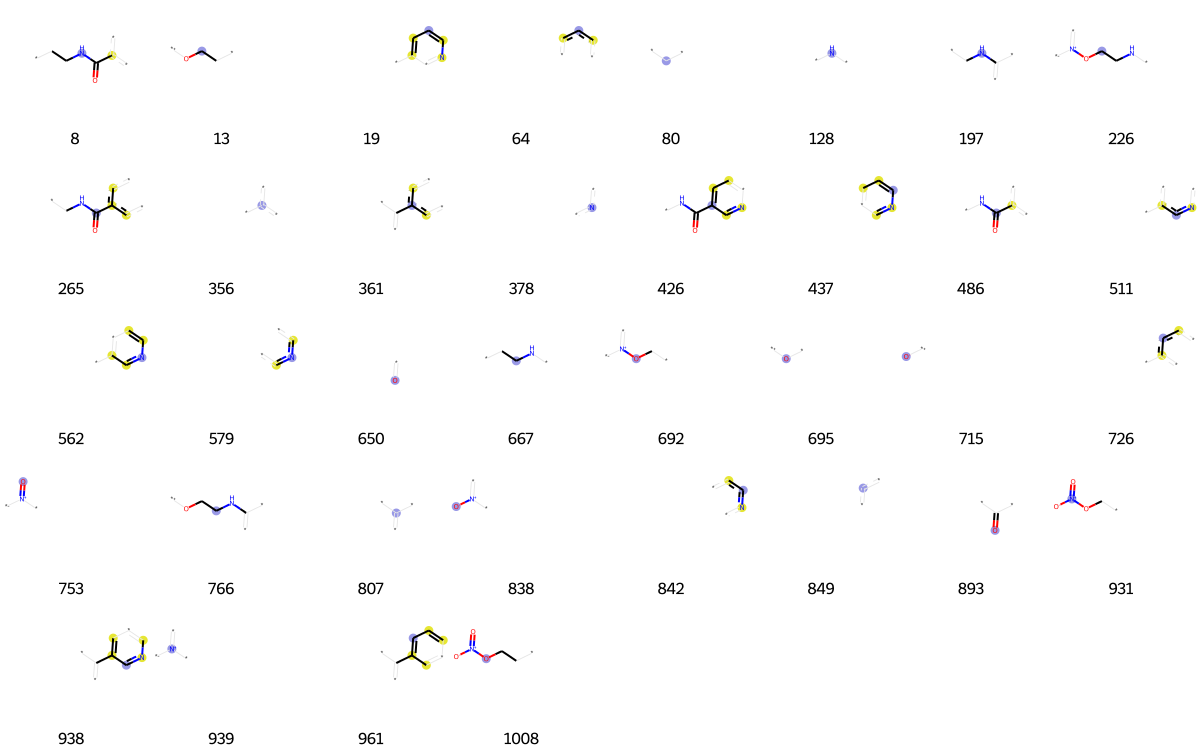

In [3020]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [3021]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[90,
 132,
 231,
 301,
 314,
 356,
 362,
 389,
 407,
 551,
 553,
 650,
 661,
 714,
 807,
 841,
 856,
 893,
 926,
 1019]

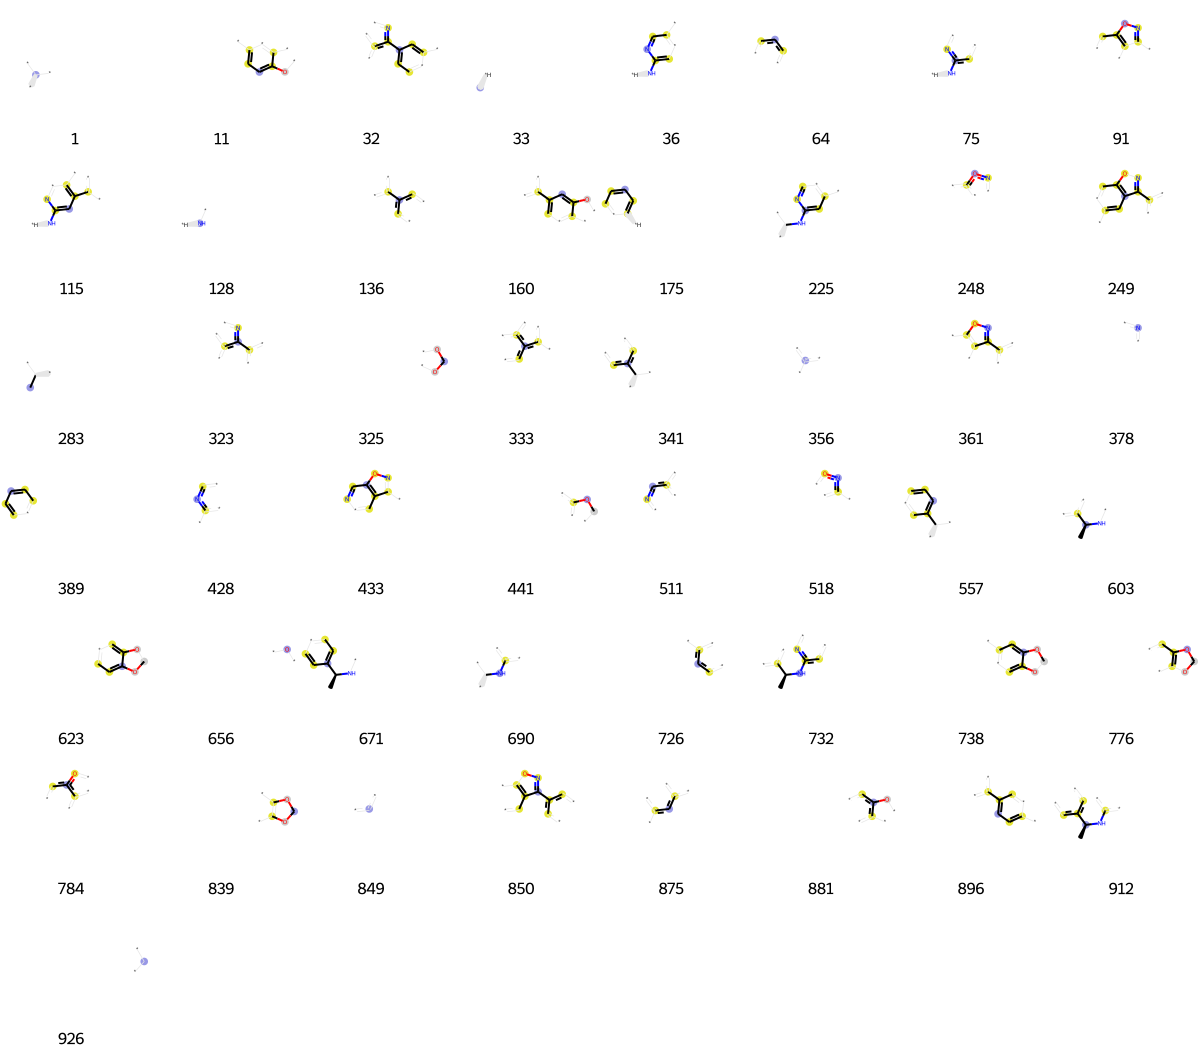

In [3022]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [3023]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 15,
 17,
 33,
 37,
 64,
 102,
 112,
 128,
 130,
 136,
 148,
 232,
 285,
 333,
 345,
 356,
 358,
 361,
 378,
 406,
 417,
 422,
 444,
 456,
 485,
 486,
 523,
 526,
 557,
 600,
 604,
 650,
 656,
 684,
 709,
 726,
 734,
 736,
 806,
 807,
 831,
 838,
 849,
 875,
 893,
 899,
 926,
 930,
 935,
 950,
 961,
 980,
 990,
 1012,
 1019]

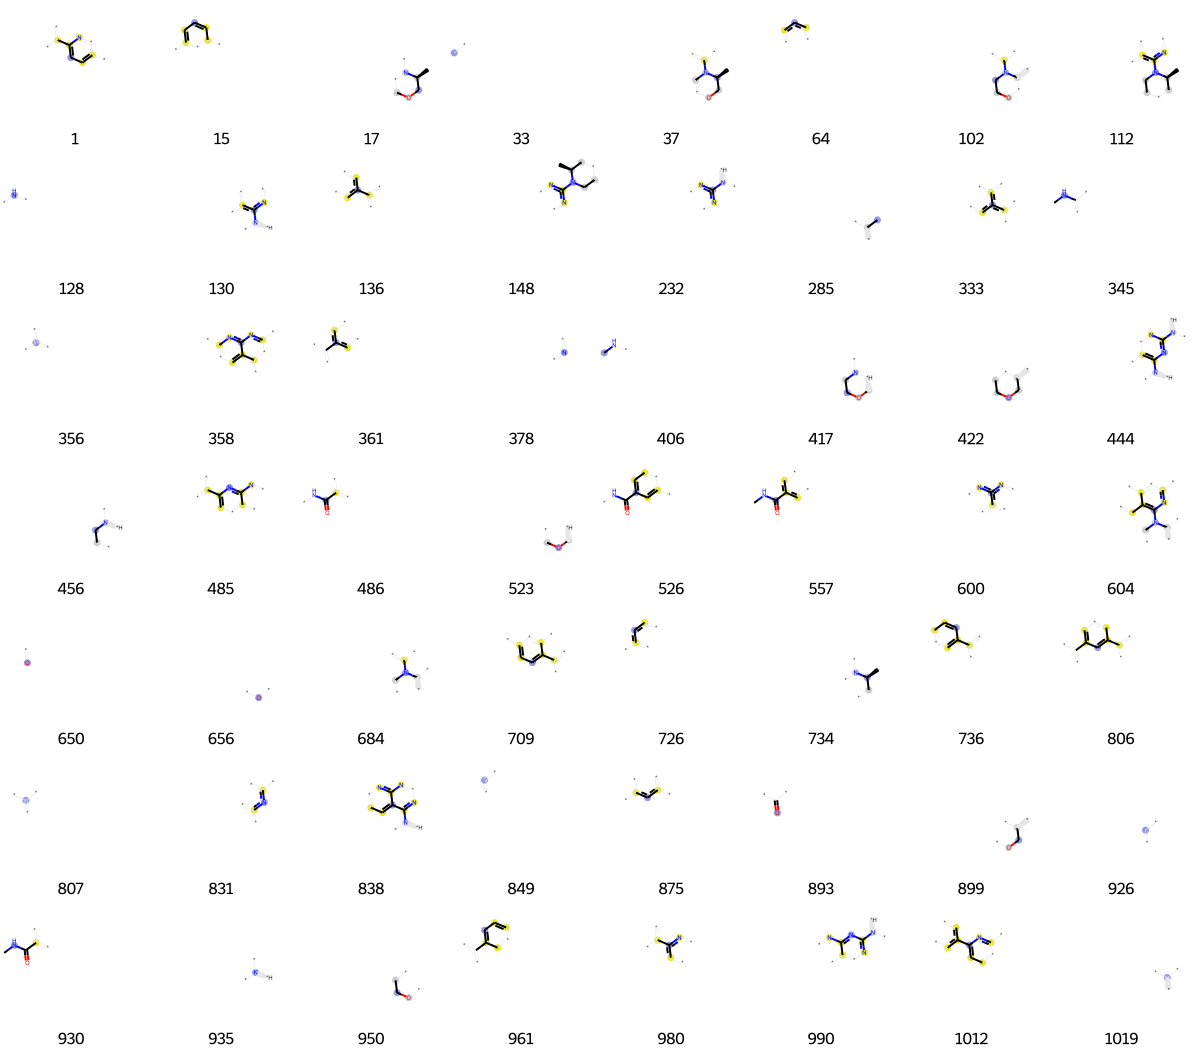

In [3024]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [3025]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[1,
 4,
 21,
 33,
 42,
 64,
 80,
 108,
 128,
 153,
 175,
 193,
 214,
 219,
 242,
 283,
 301,
 354,
 356,
 389,
 407,
 408,
 446,
 456,
 488,
 531,
 559,
 573,
 584,
 600,
 650,
 726,
 730,
 736,
 739,
 807,
 808,
 820,
 849,
 893,
 919,
 926,
 935,
 979,
 989,
 1019]

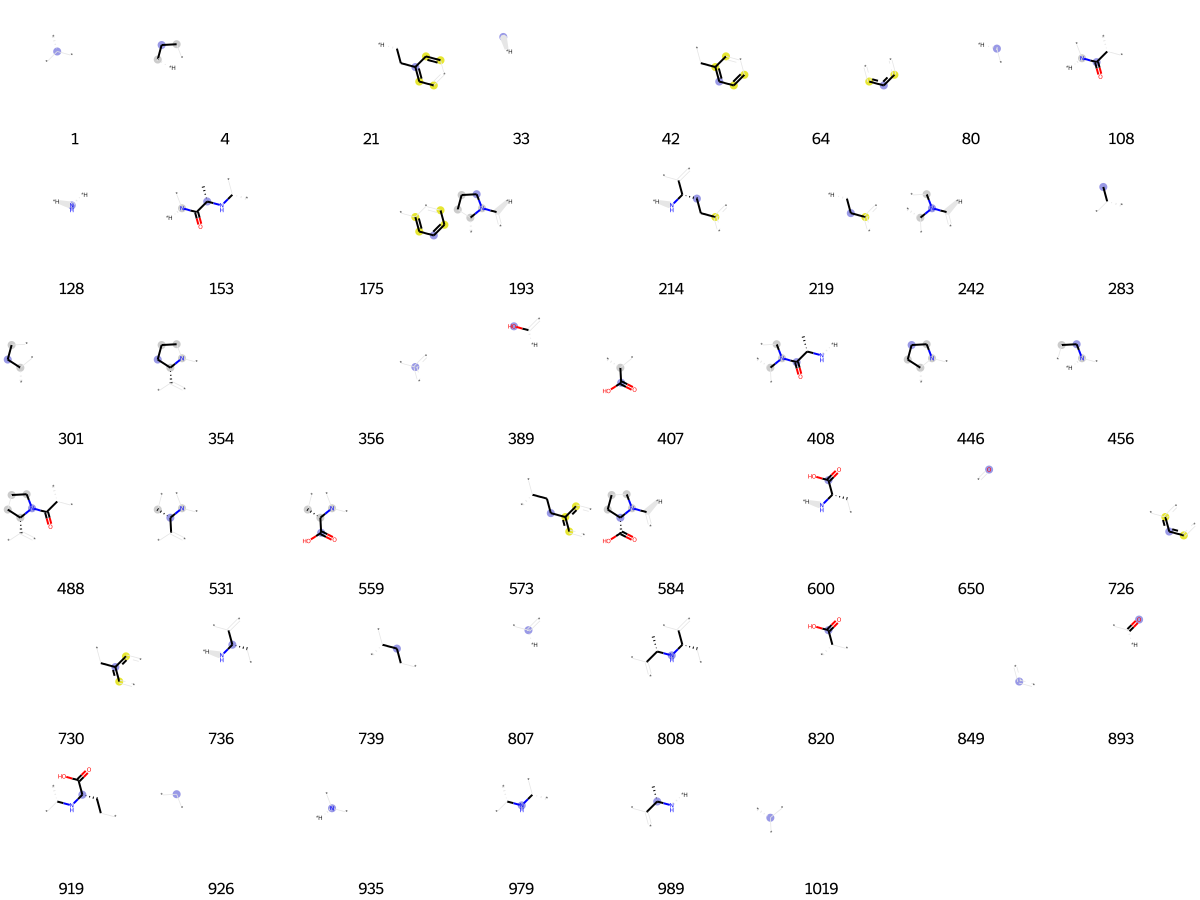

In [3026]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [3027]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[80,
 151,
 202,
 230,
 338,
 346,
 356,
 366,
 406,
 455,
 561,
 578,
 659,
 807,
 849,
 875,
 894,
 953,
 1010,
 1011]

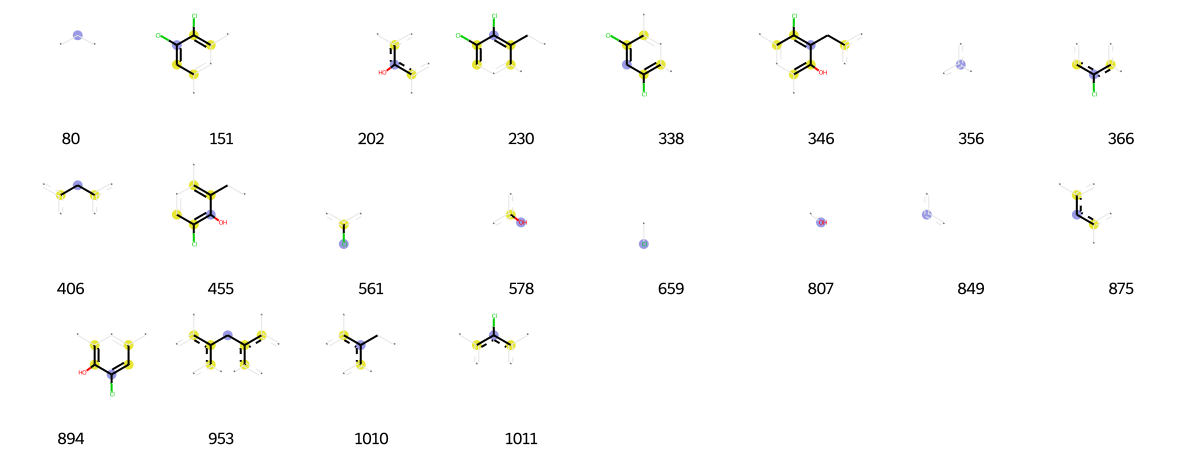

In [3028]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [3029]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[19,
 33,
 54,
 64,
 92,
 112,
 114,
 128,
 191,
 212,
 218,
 262,
 271,
 311,
 322,
 350,
 353,
 356,
 360,
 363,
 367,
 375,
 377,
 378,
 386,
 419,
 428,
 429,
 439,
 448,
 456,
 494,
 511,
 525,
 546,
 593,
 607,
 628,
 650,
 695,
 698,
 714,
 726,
 792,
 807,
 809,
 842,
 843,
 845,
 849,
 860,
 864,
 875,
 893,
 904,
 926,
 935,
 946,
 976,
 981]

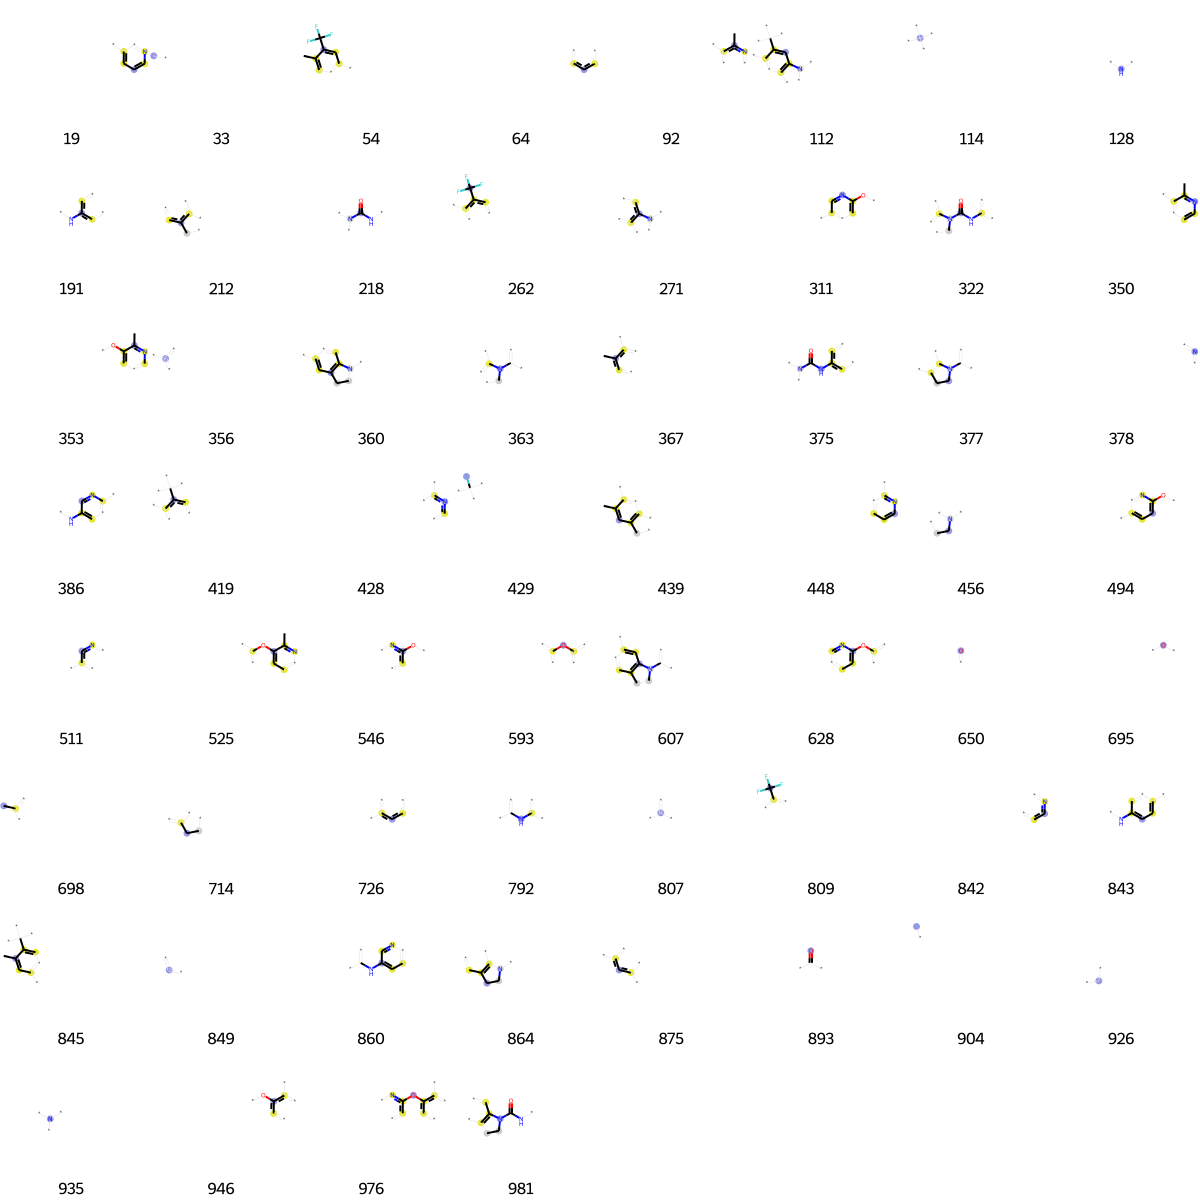

In [3030]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [3031]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[13,
 17,
 33,
 80,
 91,
 119,
 125,
 225,
 294,
 350,
 420,
 452,
 500,
 526,
 591,
 592,
 650,
 695,
 794,
 807,
 887]

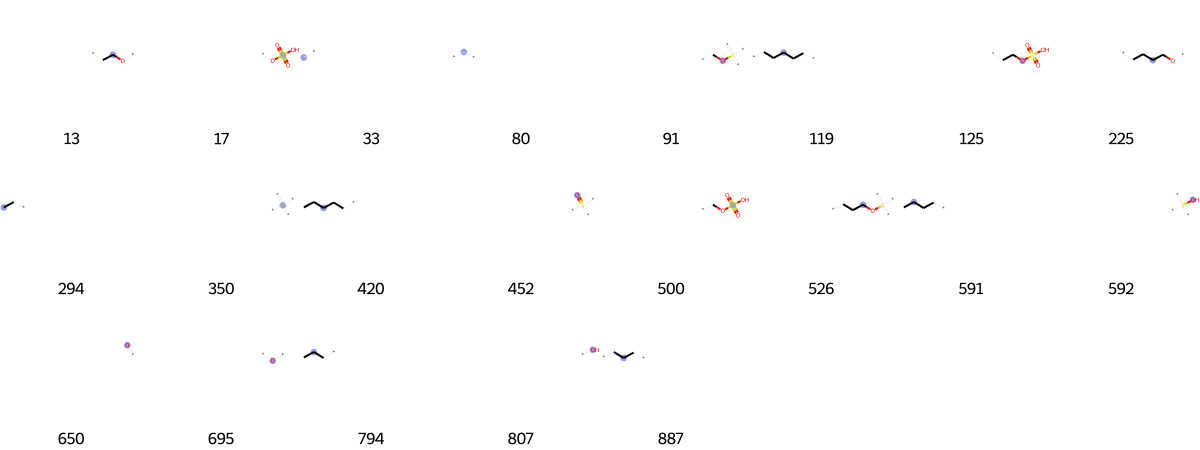

In [3032]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [3033]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[77, 118, 166, 512, 560, 650]

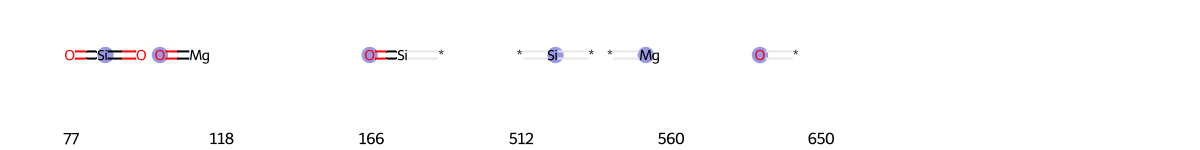

In [3034]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [3035]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[4,
 33,
 92,
 128,
 144,
 147,
 246,
 264,
 306,
 319,
 350,
 356,
 378,
 433,
 434,
 446,
 452,
 486,
 490,
 502,
 580,
 650,
 656,
 698,
 715,
 726,
 780,
 831,
 835,
 849,
 870,
 883,
 888]

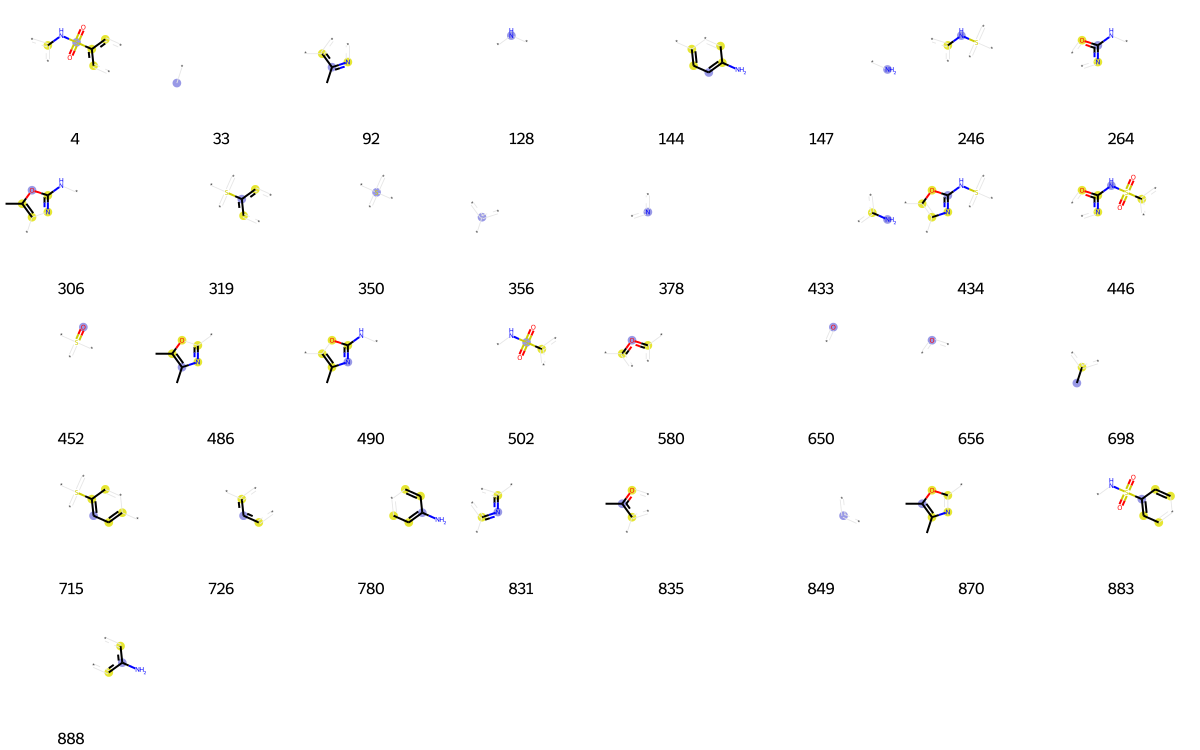

In [3036]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [3037]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[125,
 128,
 165,
 171,
 187,
 200,
 216,
 250,
 272,
 352,
 356,
 366,
 451,
 486,
 493,
 561,
 578,
 583,
 650,
 659,
 715,
 726,
 753,
 785,
 790,
 792,
 807,
 816,
 832,
 838,
 847,
 849,
 875,
 888,
 893,
 916,
 939,
 947,
 967]

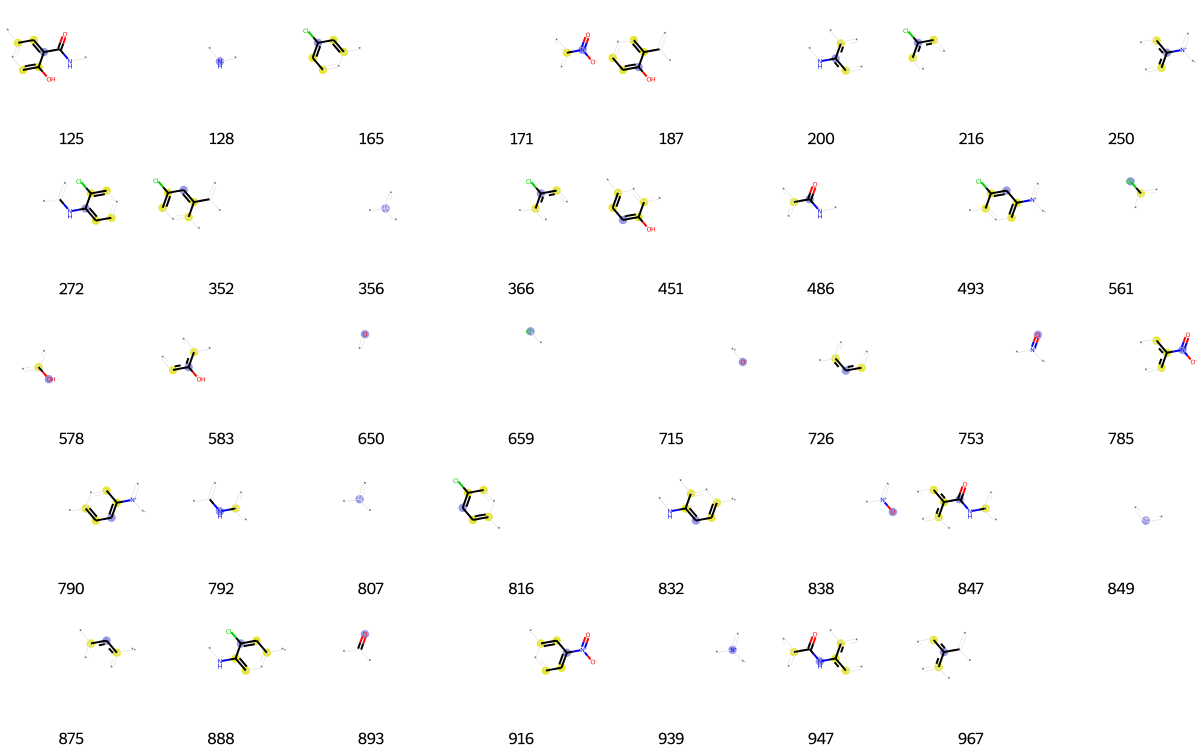

In [3038]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [3039]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[15,
 36,
 64,
 76,
 88,
 165,
 194,
 202,
 258,
 270,
 314,
 350,
 356,
 371,
 449,
 460,
 504,
 515,
 550,
 561,
 574,
 578,
 582,
 650,
 656,
 659,
 661,
 676,
 680,
 723,
 786,
 807,
 820,
 849,
 855,
 875,
 947,
 956,
 981,
 1011]

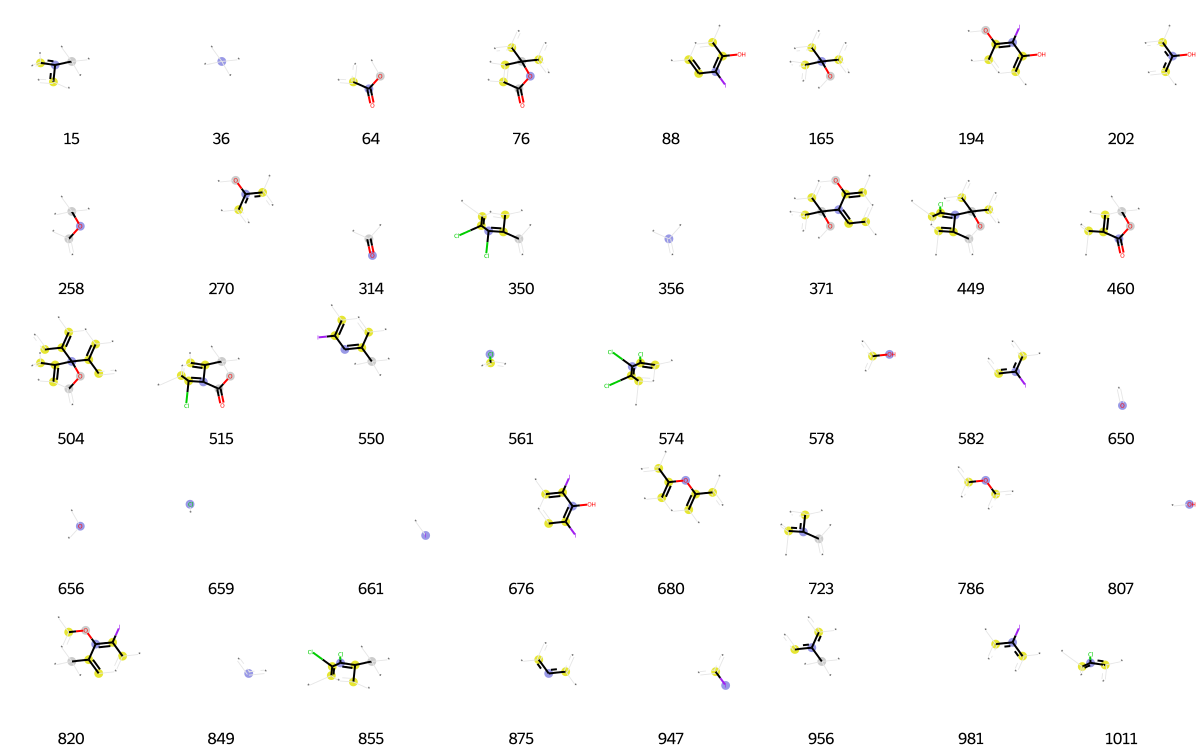

In [3040]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [3041]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[21,
 53,
 58,
 80,
 90,
 128,
 134,
 171,
 191,
 197,
 250,
 293,
 314,
 326,
 329,
 333,
 342,
 356,
 364,
 366,
 378,
 486,
 491,
 530,
 557,
 561,
 584,
 589,
 621,
 625,
 650,
 659,
 666,
 694,
 700,
 715,
 721,
 726,
 750,
 753,
 765,
 785,
 807,
 831,
 838,
 843,
 849,
 875,
 893,
 907,
 927,
 939,
 940,
 964,
 967,
 974,
 1002,
 1004]

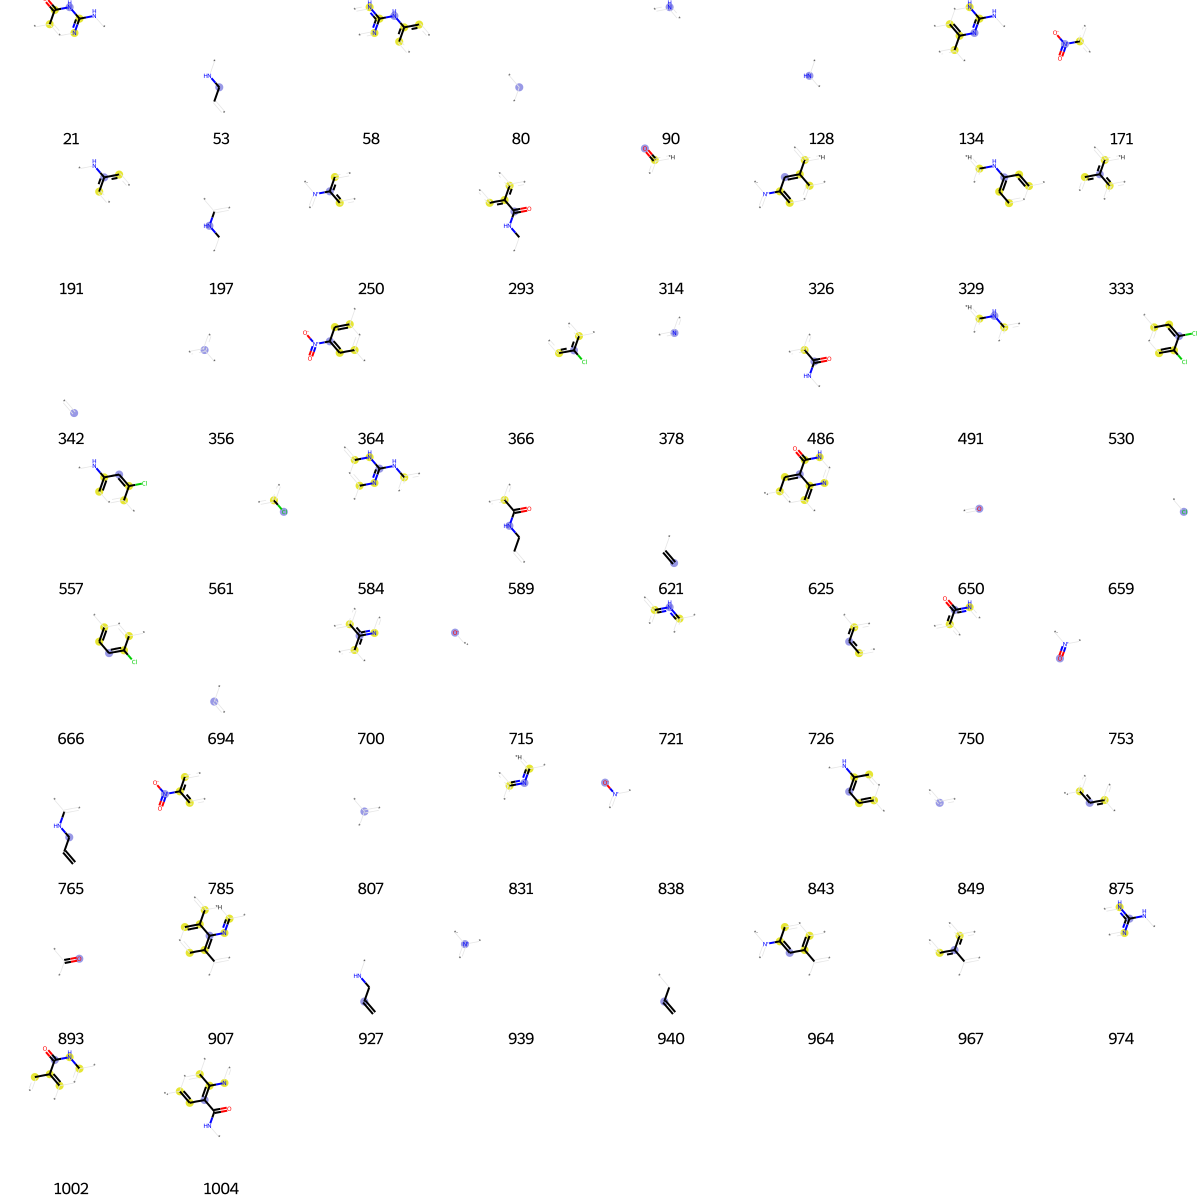

In [3042]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [3043]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 29,
 33,
 45,
 80,
 90,
 125,
 128,
 136,
 151,
 197,
 217,
 247,
 249,
 255,
 259,
 283,
 284,
 293,
 294,
 305,
 314,
 315,
 346,
 356,
 367,
 373,
 378,
 380,
 392,
 407,
 427,
 428,
 456,
 457,
 463,
 464,
 486,
 490,
 492,
 511,
 520,
 527,
 539,
 567,
 634,
 635,
 650,
 698,
 707,
 721,
 726,
 750,
 760,
 804,
 807,
 813,
 845,
 849,
 875,
 876,
 893,
 896,
 915,
 926,
 935,
 945,
 960,
 967,
 996,
 1010,
 1023]

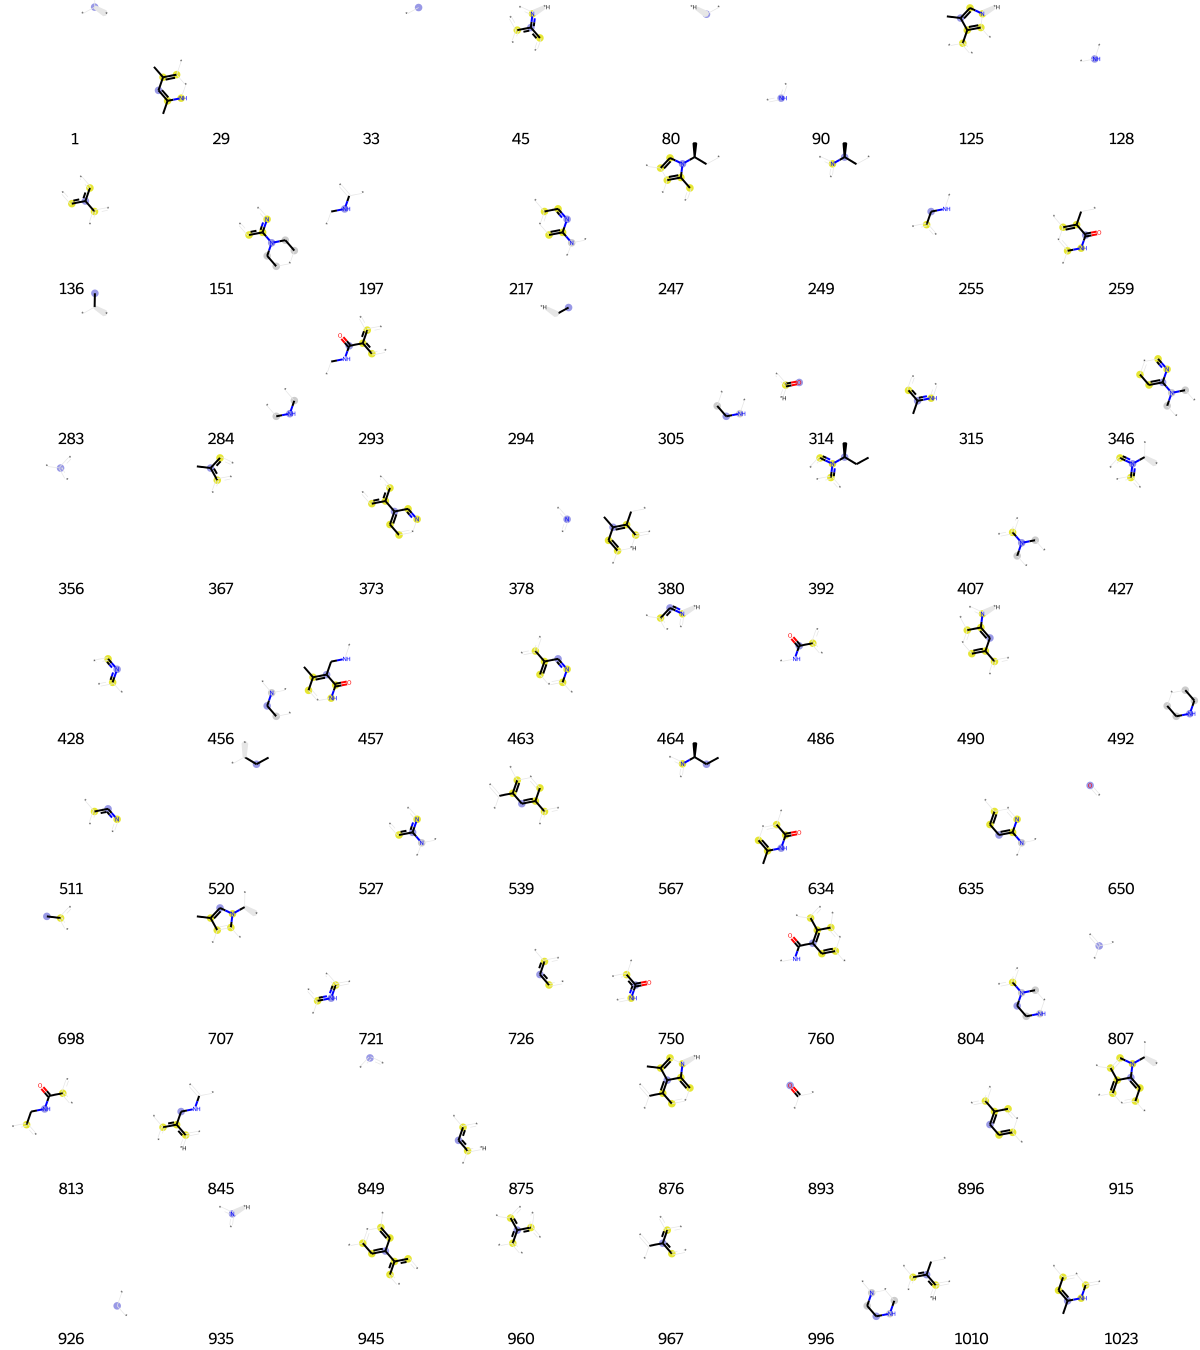

In [3044]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])